In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sbpcreator as sc
import numpy as np
import os
import copy
import sys
sys.path.append("..\\")
from pythonGUI.config import cfg
SBPFOLDER = cfg.shopbot.sbpFolder

In [5]:
slideW = 25 # mm
slideH = 75 # mm
margin = 5 # mm
#spacing = (slideH-2*margin)/12 # mm
spacing=5
nid = 0.603 # nozzle inner diameter
nd = nid + 0.152*2 # mm # nozzle = 0.603 mm ID x 0.152 mm OD x 1.5" tall (20 gauge needle)
downdisp = 0
wait1=1
wait2=0.5

dv = sc.defVars(slideW=slideW, slideH = slideH, margin=margin, spacing=spacing, nd=nd, downdisp=downdisp, diam=0.603, wait1=wait1, wait2=wait2)
dv.setUnits()
dv.setSpeeds(m=10, j=20)
dv.setRamps(mr=5, jr=5, rate=2, dist=1)
# dv.turnOn(0);

### double lines

Exported file C:\Users\lmf1\OneDriveNIST\NIST\data\shopbot\SBP files\underSlide.sbp


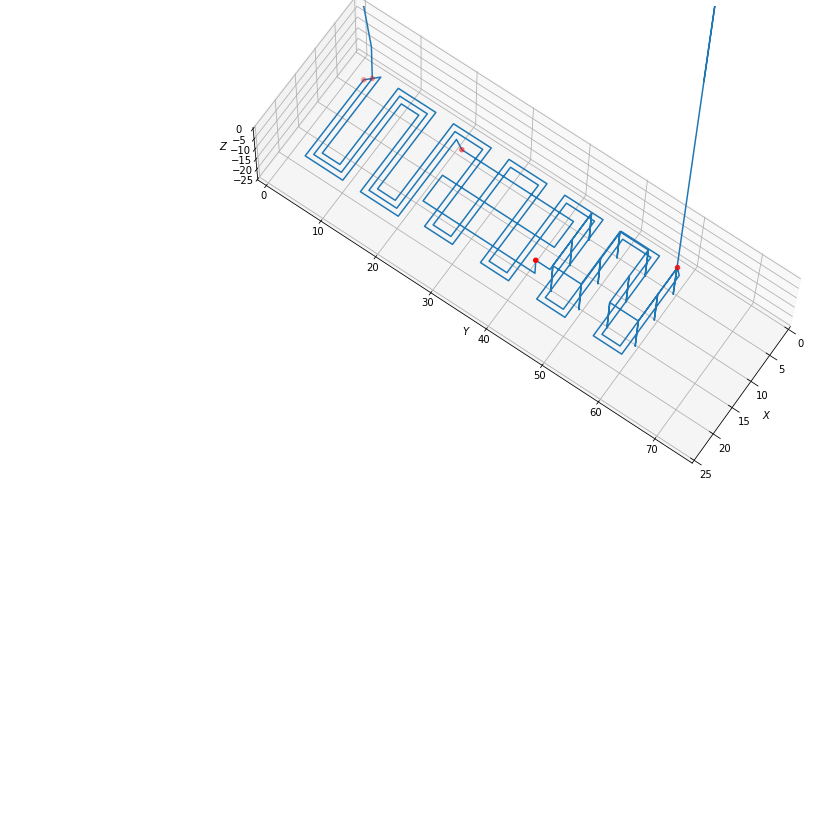

In [17]:
total = dv

total = total + sc.startingPoint(0,0,0)
total.turnOn(3)

zz = sc.zigzag(lastPt=total)
zz.x0 = '&margin'
zz.y0 = '&margin'
zz.z0 = '-25+2*&margin'
zz.spacing1 = '&spacing'
zz.spacing2 = '&spacing'
zz.updateReps(slideH, margin, 3)
total = total + zz

zz2 = sc.zigzag(lastPt=total)
zz2.x0 = sc.p(zz2.x0, '-&nd')
zz2.y0 = sc.p(zz2.y0, '-&nd')
zz2.longdir = '+x'
zz2.shortdir = '-y'
zz2.spacing1 = '(&spacing+2*&nd)'
zz2.spacing2 = '(&spacing-2*&nd)'
zz2.updateReps(slideH, margin, 3)
total = total + zz2

zz3 = sc.zigzag(lastPt=total)
zz3.x0 = sc.p(zz3.x0, '2*&nd')
zz3.y0 = sc.p(zz3.y0, '-2*&nd')
zz3.longdir = '+x'
zz3.shortdir = '+y'
zz3.spacing1 = '(&spacing-2*&nd)'
zz3.spacing2 = '(&spacing+2*&nd)'
zz3.reps=int(zz2.reps/3)
total = total + zz3

zz4 = sc.zigzag(lastPt = total)
zz4.x0 = sc.p(zz4.x0, '&nd')
zz4.y0 = sc.p(zz4.y0, '(&spacing-2*&nd)/2')
zz4.longdir = '+y'
zz4.shortdir = '+x'
zz4.spacing1 = '&spacing'
zz4.spacing2 = '&spacing'
zz4.reps = 3
zz4.width = '4*&spacing'
total = total + zz4

v1 = sc.verts(zigzag=zz2, start=3, end=0, disp='&nd', lastPt=total)

v1.downdisp = '&downdisp'
v1.setSpacing(5)
v1.longlist = [sc.p(i,2) for i in v1.longlist]
total = total + v1
total.turnOff(3)
total.withdraw()
total.plot()
total.export(os.path.join(SBPFOLDER, 'underSlide.sbp'), [])
# print(total.convertFile('spacing'))

Exported file C:\Users\lmf1\OneDriveNIST\NIST\data\shopbot\SBP files\sideHorizSlide.sbp


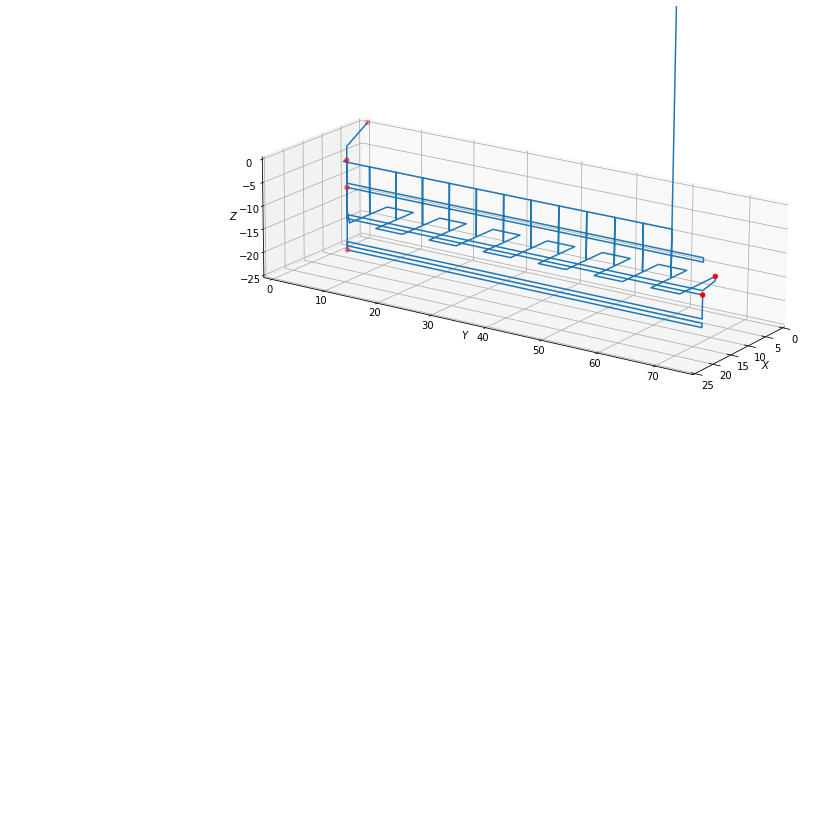

In [18]:
total = dv
xmed = slideW/2

total = total + sc.startingPoint(0,0,0)
total.turnOn(3)

zz = sc.zigzag(lastPt=total)
zz.x0 = xmed
zz.y0 = '&margin'
zz.z0 = '(-&slideW+&margin/2)'
zz.longdir = '+y'
zz.shortdir = '+z'
zz.spacing1 = '&nd'
zz.spacing2 = '&nd'
zz.width = '(&slideH-2*&margin)'
zz.reps=3
total = total + zz

zz2 = sc.zigzag(lastPt=total)
zz2.z0 = sc.p(zz2.z0, '&spacing')
zz2.longdir = '-y'
zz2.shortdir = '+z'
zz2.spacing1 = '&nd'
zz2.spacing2 = '&nd'
zz2.reps=2
zz2.width = '(&slideH-2*&margin)'
total = total + zz2

zz3 = sc.zigzag(lastPt=total)
zz3.z0 = sc.p(zz3.z0, '&nd')
# zz3.x0 = sc.p(xmed, '-&slideW/2+&margin')
zz3.x0 = sc.p(xmed, '-&margin')
zz3.y0 = sc.p(zz3.y0, '-&nd')
zz3.longdir = '+x'
zz3.shortdir = '-y'
zz3.spacing1 = '&spacing'
zz3.spacing2 = '&spacing'
# zz3.width = '&slideW-2*&margin'
zz3.width = '2*&margin'
zz3.updateReps(slideH, margin, 1)
total = total + zz3

zz4 = sc.zigzag(lastPt = total)
zz4.x0 = xmed
zz4.y0 = '&margin'
zz4.z0 = sc.p(zz4.z0, '&spacing')
zz4.longdir = '+y'
zz4.shortdir = '+z'
zz4.spacing1 = '&nd'
zz4.spacing2 = '&nd'
zz4.reps=2
zz4.width = '&slideH-2*&margin'
total = total + zz4

v1 = sc.verts(lastPt=total)
v1.singleUpDownRow(direc='+y', longlist=['2*&margin', '&slideH-&margin'], const=sc.p(xmed, '&nd'), spacing1='&spacing')
v1.setZBounds(v1.cp[2], '&spacing')
v1.downdisp = '&downdisp'

total = total + v1


total.turnOff(3)
total.withdraw()

total.plot(ele=20)


total.export(os.path.join(SBPFOLDER, 'sideHorizSlide.sbp'), [])
# print(total.convertFile('spacing'))

<Axes3DSubplot:xlabel='$X$', ylabel='$Y$'>

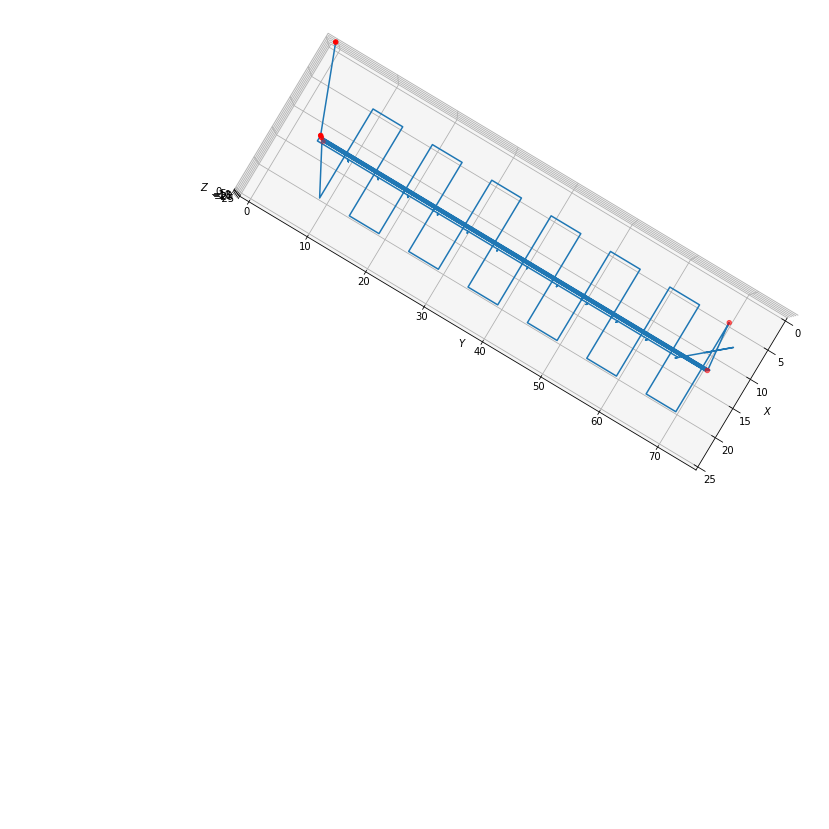

In [37]:
total.plot(ele=90)

Exported file C:\Users\lmf1\OneDriveNIST\NIST\data\shopbot\SBP files\sideVertSlide.sbp


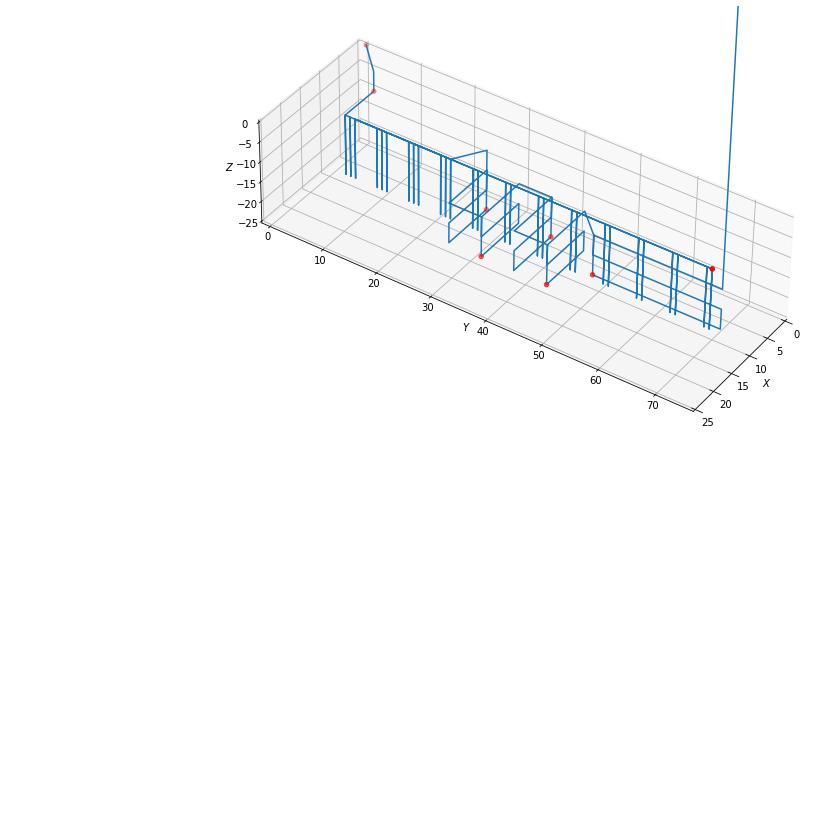

In [19]:
total = dv
xmed = slideW/2

total = total + sc.startingPoint(0,0,0)
total.m2(5,5)
total.turnOn(3)

v1 = sc.verts(lastPt=total)
v1.singleUpDownRow(direc='+y', longlist=['&margin', '&slideH'], const=xmed, spacing2='&nd', spacing1='&spacing')
v1.zmax = '-&margin'
v1.zmin = '-&slideW+&margin'
v1.downdisp = 0
total = total + v1

v2 = sc.verts(lastPt=total)
v2.singleUpDownRow(direc='+y', longlist=['&margin+2*&nd', '35'], const=xmed, spacing1='&spacing+&nd')
v2.zmax = '-&margin'
v2.zmin = '-&slideW+&margin'
v2.downdisp = 0
total = total + v2

for i in [8,10,12,14]:
    zz3 = sc.zigzag(lastPt=total)
    zz3.z0 = '&margin-&slideW'
    
    
    zz3.y0 = sc.p(v1.longlist[i], '-&nd')
    if i==8 or i==12:
        zz3.longdir = '+x'
        zz3.x0 = sc.p(v1.shortlist[0], '-&spacing')
    else:
        zz3.longdir = '-x'
        zz3.x0 = sc.p(v1.shortlist[0], '&spacing')
    zz3.shortdir = '+z'
    zz3.spacing1 = '&spacing'
    zz3.spacing2 = '&spacing'
    zz3.width = '2*&spacing'
    zz3.updateReps(slideW, margin, 1)
    total = total + zz3
    
zz4 = sc.zigzag(lastPt = total)
zz4.x0 = sc.p(v1.shortlist[0], '-&nd')
zz4.y0 = sc.p(v1.longlist[16], '-&spacing/2')
zz4.z0 = '&margin-&slideW'
zz4.longdir = '+y'
zz4.shortdir = '+z'
zz4.spacing1 = '&spacing'
zz4.spacing2 = '&spacing'
zz4.reps=3
zz4.width = '&spacing*4.5'
total = total + zz4




total.turnOff(3)
total.withdraw()
total.plot(ele=40)
total.export(os.path.join(SBPFOLDER, ,'sideVertSlide.sbp'), [])
# print(total.convertFile('spacing'))

### single Lines

0.057829512760943516  mL


<Axes3DSubplot:xlabel='$X$', ylabel='$Y$'>

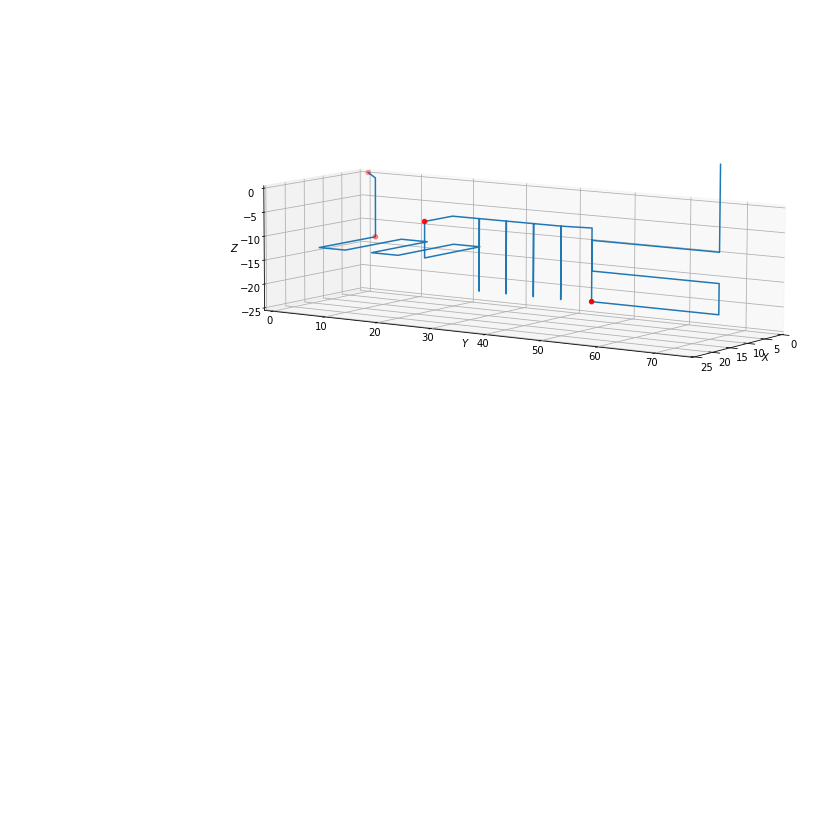

In [331]:
total = copy.deepcopy(dv)

total = total + sc.startingPoint(0,0,0)
total.turnOn(3)

zz = sc.zigzag(lastPt=total, killZigs=True)
zz.x0 = '&margin'
zz.y0 = '&margin'
zz.z0 = '-&slideW/2'
zz.spacing1 = '&spacing'
zz.spacing2 = '&spacing'
zz.updateReps(slideH/2, margin, 1)
total = total + zz

xmed = slideW/2
v1 = sc.verts(lastPt=total)
v1.singleUpDownRow(direc='+y', longlist=['&slideH/3+&margin', '&slideH*2/3'], const=xmed, spacing2='&spacing', spacing1='&spacing')
v1.zmax = '-&margin'
v1.zmin = '-&slideW+&margin'
v1.downdisp = 0
total = total + v1

zz4 = sc.zigzag(lastPt = total, killZigs=True)
zz4.x0 = sc.p(v1.shortlist[0], '-&nd')
zz4.y0 = sc.p(v1.longlist[-1], '&spacing')
zz4.z0 = '&margin-&slideW'
zz4.longdir = '+y'
zz4.shortdir = '+z'
zz4.spacing1 = '&spacing*1.25'
zz4.spacing2 = '&spacing*1.25'
zz4.reps=3
zz4.width = '&spacing*4.5'
total = total + zz4


total.turnOff(3)
total.mz(10)
print(total.volume/1000, ' mL')
# total.withdraw()
total.plot(ele=10)
#total.export(os.path.join(SBPFOLDER, 'singleLinesNoZig.sbp'), [])
# print(total.convertFile('spacing'))

Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\singleLinesNoZig_fullLines.sbp


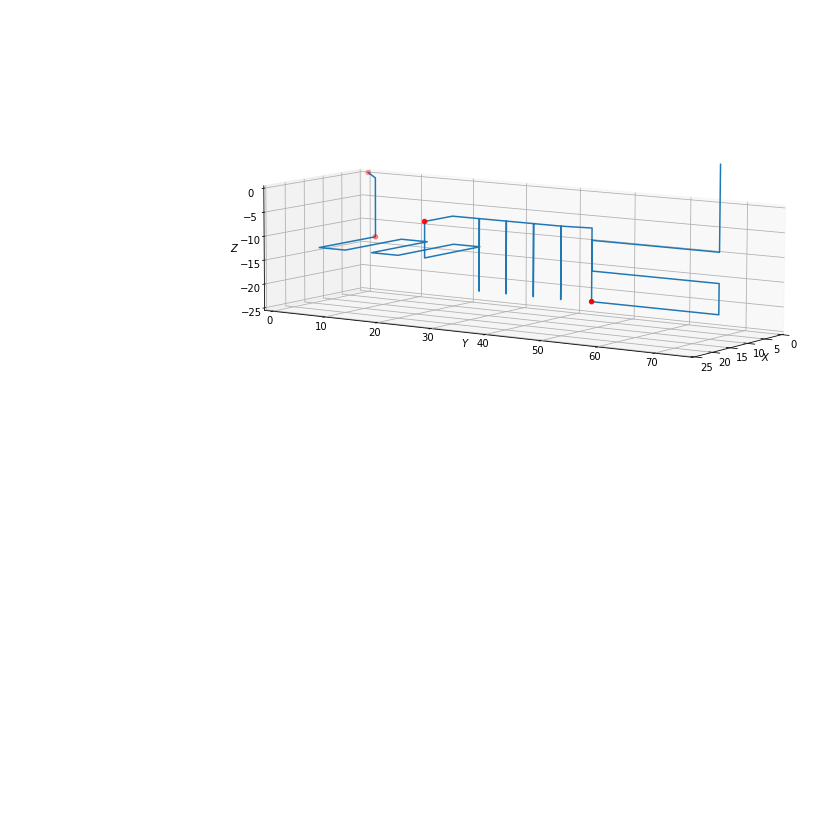

In [11]:
total = copy.deepcopy(dv)

total = total + sc.startingPoint(0,0,0)
total.turnOn(3)

zz = sc.zigzag(lastPt=total, killZigs=True)
zz.x0 = '&margin'
zz.y0 = '&margin'
zz.z0 = '-&slideW/2'
zz.spacing1 = '&spacing'
zz.spacing2 = '&spacing'
zz.updateReps(slideH/2, margin, 1)
total = total + zz

xmed = slideW/2
v1 = sc.verts(lastPt=total)
v1.singleUpDownRow(direc='+y', longlist=['&slideH/3+&margin', '&slideH*2/3'], const=xmed, spacing2='&spacing', spacing1='&spacing')
v1.zmax = '-&margin'
v1.zmin = '-&slideW+&margin'
v1.downdisp = 0
total = total + v1

zz4 = sc.zigzag(lastPt = total, killZigs=True)
zz4.x0 = sc.p(v1.shortlist[0], '-&nd')
zz4.y0 = sc.p(v1.longlist[-1], '&spacing')
zz4.z0 = '&margin-&slideW'
zz4.longdir = '+y'
zz4.shortdir = '+z'
zz4.spacing1 = '&spacing*1.25'
zz4.spacing2 = '&spacing*1.25'
zz4.reps=3
zz4.width = '&spacing*4.5'
total = total + zz4


total.turnOff(3)
total.mz(10)
# total.withdraw()
total.plot(ele=10)
total.export(os.path.join(SBPFOLDER, 'singleLinesNoZig_fullLines.sbp'), [])
# print(total.convertFile('spacing'))

### singleLinesPics

Exported file C:\Users\lmf1\OneDriveNIST\NIST\data\shopbot\software\SBP files\singleLinesPics.sbp


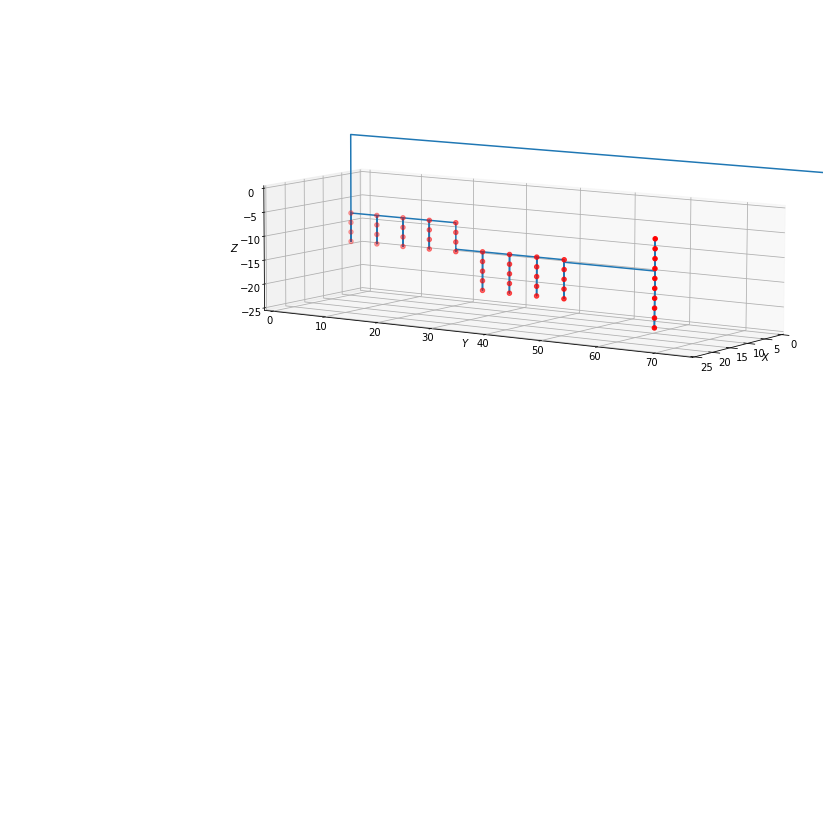

In [41]:
import copy

total = copy.deepcopy(dv)

total.turnOn(3)


pic = sc.pics(channel=2, wait=2, lastPt=zz4)
pic.my(sc.mean(zz4.longlist[0], zz4.longlist[-1]))
for z in np.arange(-24, -4, 2):
    pic.mz(z)
    pic.snap()
    
pic.mz(sc.mean(v1.zmax, v1.zmin))
l1 = copy.deepcopy(v1.longlist)
# l1.reverse()
for y in l1:
    pic.my(y)
    for z in np.arange(-20, -10, 2):
        pic.mz(z)
        pic.snap()

# print(pic.convertPts(pic.positions))
 
yli = copy.deepcopy(zz.shortlist)
# yli.reverse()
for y in yli:
    pic.my(y)
    for zadd in range(0, 8, 2):
        pic.mz(sc.p(zz.z0, zadd))
        pic.snap()
total = total+pic



total.withdraw()
# print(total.convertFile(['margin', 'slideW', 'spacing', 'slideH']))
total.plot(ele=10)
total.export(os.path.join(SBPFOLDER, 'singleLinesPics.sbp'), [])


Exported file C:/Users/lmf1/Documents/GitHub/ShopbotPyQt/SBP files\singleLinesPics2.sbp


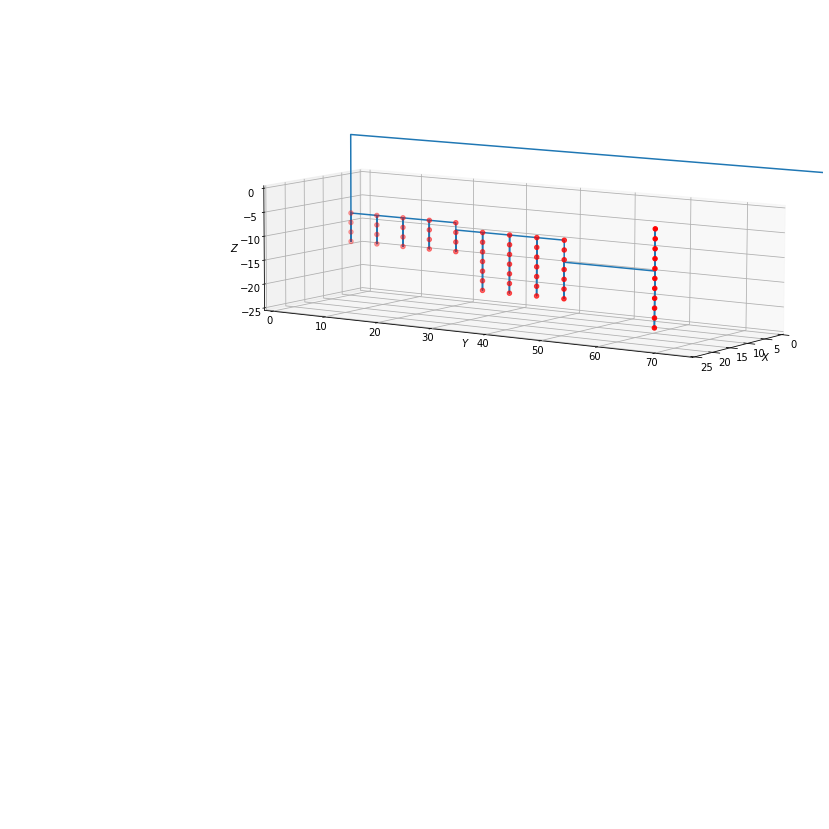

In [10]:
import copy
vardefs = {'wait1':1, 'wait2':1}
total = copy.deepcopy(dv)

total.turnOn(3)

pic = sc.pics(channel=2, wait=2, lastPt=zz4)
pic.my(sc.mean(zz4.longlist[0], zz4.longlist[-1]))
for z in np.arange(-24, -2, 2):
    pic.mz(z)
    pic.snap()
    
pic.mz(sc.mean(v1.zmax, v1.zmin))
l1 = copy.deepcopy(v1.longlist)
l1.reverse()
for y in l1:
    pic.my(y)
    for z in np.arange(-20, -6, 2):
        pic.mz(z)
        pic.snap()

# print(pic.convertPts(pic.positions))
 
yli = copy.deepcopy(zz.shortlist)
yli.reverse()
for y in yli:
    pic.my(y)
    for zadd in range(0, 8, 2):
        pic.mz(sc.p(zz.z0, zadd))
        pic.snap()
total = total+pic



total.withdraw()
# print(total.convertFile(['margin', 'slideW', 'spacing', 'slideH']))
total.plot(ele=10)
total.export(os.path.join(SBPFOLDER, 'singleLinesPics2.sbp'), [])


Exported file C:/Users/lmf1/Documents/GitHub/ShopbotPyQt/SBP files\singleLinesPics4.sbp


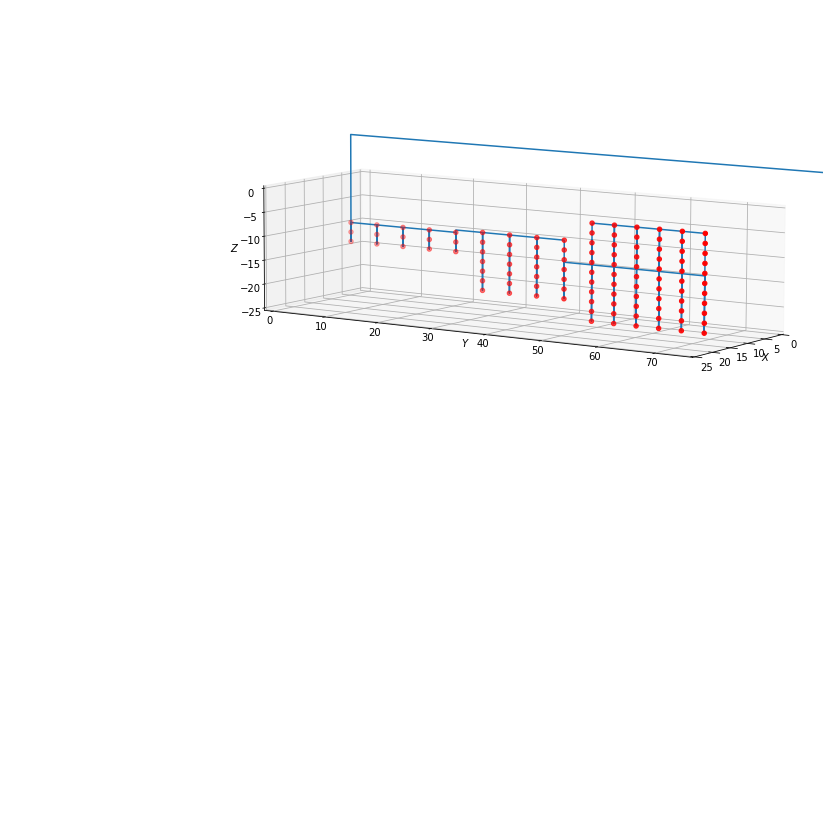

In [8]:
import copy
vardefs = {'wait1':1, 'wait2':1}
total = copy.deepcopy(dv)

total.turnOn(3)

pic = sc.pics(channel=2, wait=2, lastPt=zz4)
for y in np.arange(50, 72.5, 4 ):
    pic.my(y)
    for z in np.arange(-24, -2, 2):
        pic.mz(z)
        pic.snap()
    
pic.mz(sc.mean(v1.zmax, v1.zmin))
l1 = copy.deepcopy(v1.longlist)
l1.reverse()
for y in l1:
    pic.my(y)
    for z in np.arange(-20, -6, 2):
        pic.mz(z)
        pic.snap()

# print(pic.convertPts(pic.positions))
 
yli = copy.deepcopy(zz.shortlist)
yli.reverse()
for y in yli:
    pic.my(y)
    for zadd in range(0, 6, 2):
        pic.mz(sc.p(zz.z0, zadd))
        pic.snap()
total = total+pic



total.withdraw()
# print(total.convertFile(['margin', 'slideW', 'spacing', 'slideH']))
total.plot(ele=10)
total.export(os.path.join(SBPFOLDER, 'singleLinesPics4.sbp'), [])


Exported file C:/Users/lmf1/Documents/GitHub/ShopbotPyQt/SBP files\singleLinesPics5.sbp


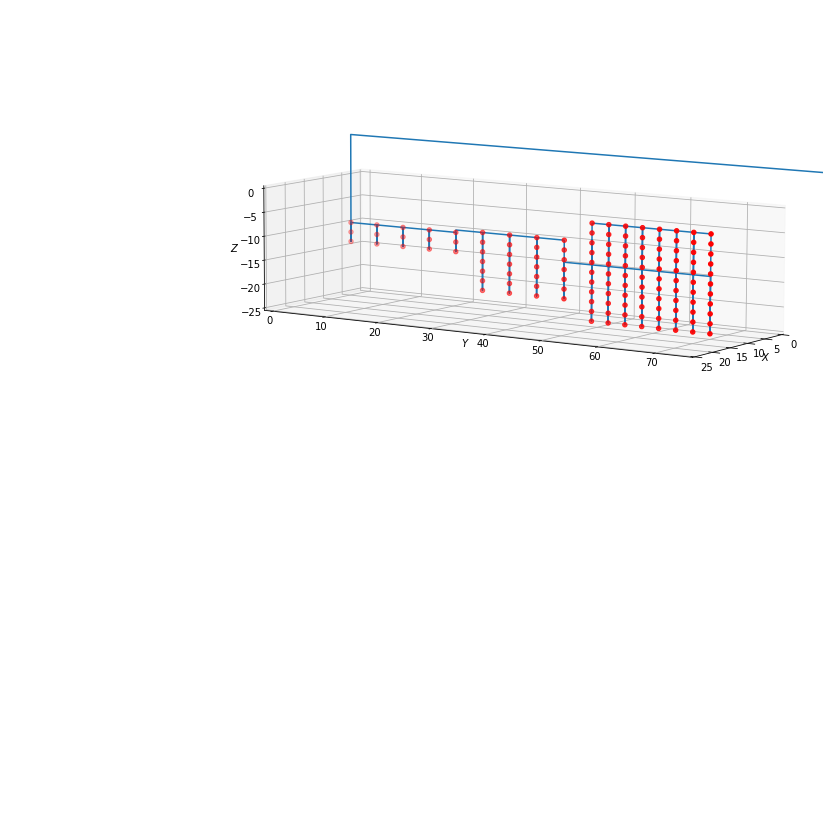

In [7]:
import copy
vardefs = {'wait1':1, 'wait2':1}
total = copy.deepcopy(dv)

total.turnOn(3)

pic = sc.pics(channel=2, wait=2, lastPt=zz4)
for y in np.arange(50, 72.5, 3 ):
    pic.my(y)
    for z in np.arange(-24, -2, 2):
        pic.mz(z)
        pic.snap()
    
pic.mz(sc.mean(v1.zmax, v1.zmin))
l1 = copy.deepcopy(v1.longlist)
l1.reverse()
for y in l1:
    pic.my(y)
    for z in np.arange(-20, -6, 2):
        pic.mz(z)
        pic.snap()

# print(pic.convertPts(pic.positions))
 
yli = copy.deepcopy(zz.shortlist)
yli.reverse()
for y in yli:
    pic.my(y)
    for zadd in range(0, 6, 2):
        pic.mz(sc.p(zz.z0, zadd))
        pic.snap()
total = total+pic



total.withdraw()
# print(total.convertFile(['margin', 'slideW', 'spacing', 'slideH']))
total.plot(ele=10)
total.export(os.path.join(SBPFOLDER, 'singleLinesPics5.sbp'), [])


### triple line spacing sweep

##### tripleLinesXS

Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesSide\tripleLinesXS_+y_0.500.sbp
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesSide\tripleLinesXS_+y_0.625.sbp
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesSide\tripleLinesXS_+y_0.750.sbp
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesSide\tripleLinesXS_+y_0.875.sbp
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesSide\tripleLinesXS_+y_1.000.sbp
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesSide\tripleLinesXS_+y_1.250.sbp
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesSide\tripleLinesXS_+z_0.500.sbp
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesSide\tripleLinesXS_+z_0.625.sbp
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesSide\tripleLinesXS_+z_0.750.sbp
Exported f

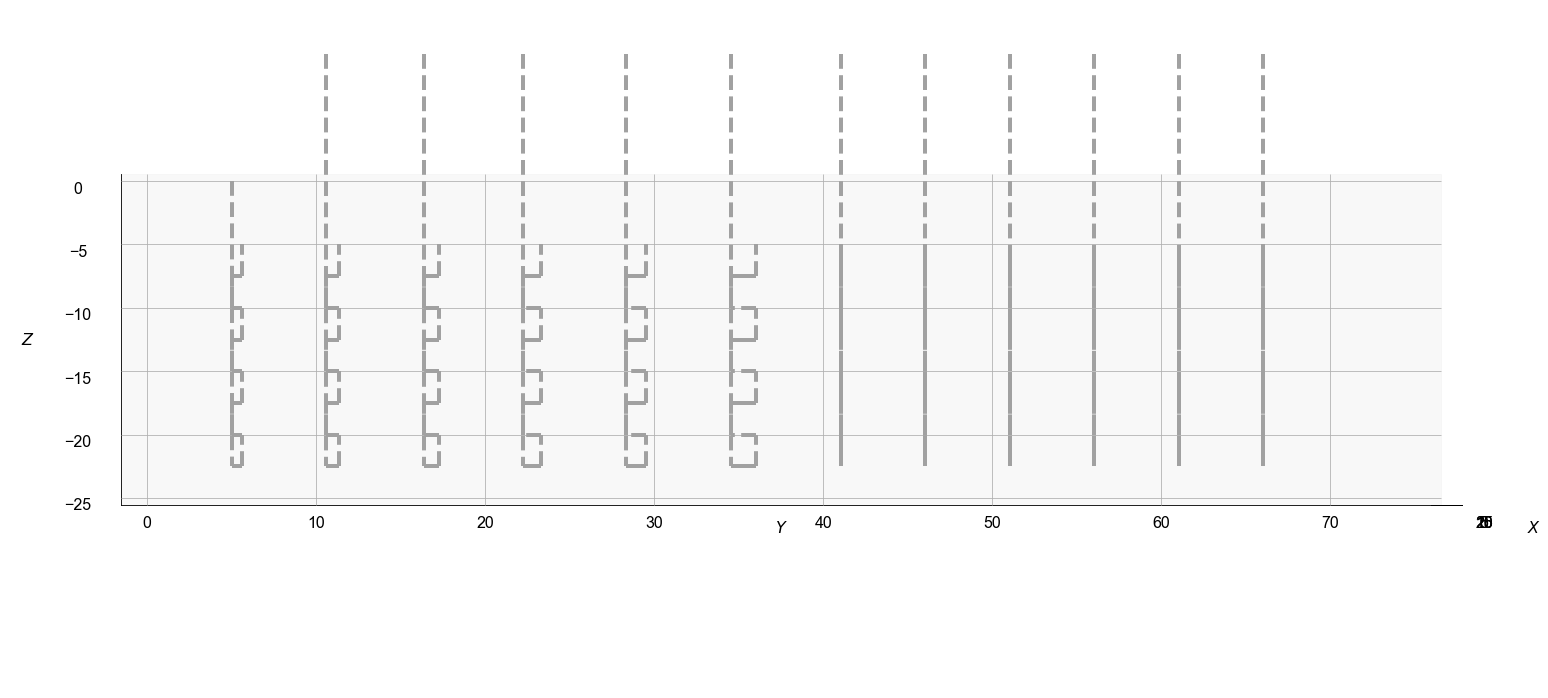

In [17]:
ylast = 0
total2 = copy.deepcopy(dv)
total2.addVar('nid', 0.603)
total2 = total2 + sc.startingPoint(0,0,0)
total2.turnOn(3)
# head-on, in plane
for shortdir in ['+y', '+z']:
    for i,spacing in enumerate([0.5, 0.625, 0.75, 0.875, 1, 1.25]):
        total = copy.deepcopy(dv)
        total.addVar('nid', 0.603)
        if i==0 and shortdir=='+y':
            total = total + sc.startingPoint(0,0,0)
        else:
            total = total + sc.startingPoint(zz.cp[0], zz.cp[1], zz.cp[2])
        total.turnOn(3)

        for z0frac in [0.9, 0.7, 0.5, 0.3]:
            zz = sc.zigzag(lastPt=total2, killZigs=True)
            zz.x0 = '&slideW/2-&margin'
            zz.y0 = f'&margin+{ylast}'
            zz.z0 = f'-{z0frac}*&slideW'
            zz.width = f'2*&margin'
            zz.spacing1 = f'&nid*{spacing}'
            zz.spacing2 = f'&nid*{spacing}'
            zz.reps=3
            zz.shortdir = shortdir
            zz.sbp() # create zigzag
            zz.jz(f'-{z0frac-0.1}*&slideW')  # go halfway to next layer
            
            total = total + zz
            total2 = total2+zz
            zz1 = copy.deepcopy(zz)
        ylast = zz.cp[1]
        total.mz(10)
        total2.mz(10)
        total.turnOff(3)
        total.export(os.path.join(SBPFOLDER,'tripleLinesSide',  f'tripleLinesXS_{shortdir}_{spacing:.3f}.sbp'), [])

total2.turnOff(3)
total2.mz(10)        
total2.printVolume()
total2.plot(ele=10, azi=10, export=True, fn=os.path.join(r'C:\Users\lmf1\OneDriveNIST\NIST\data\shopbot\results\tripleLines', f'tripleLinesXS.png'), grids=False)
total2.plot(ele=0, azi=0, export=False, grids=True)
# print(total.convertFile('spacing'))

0.000 mL, 2 min 49 s
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesSide\tripleLinesXSPics.sbp


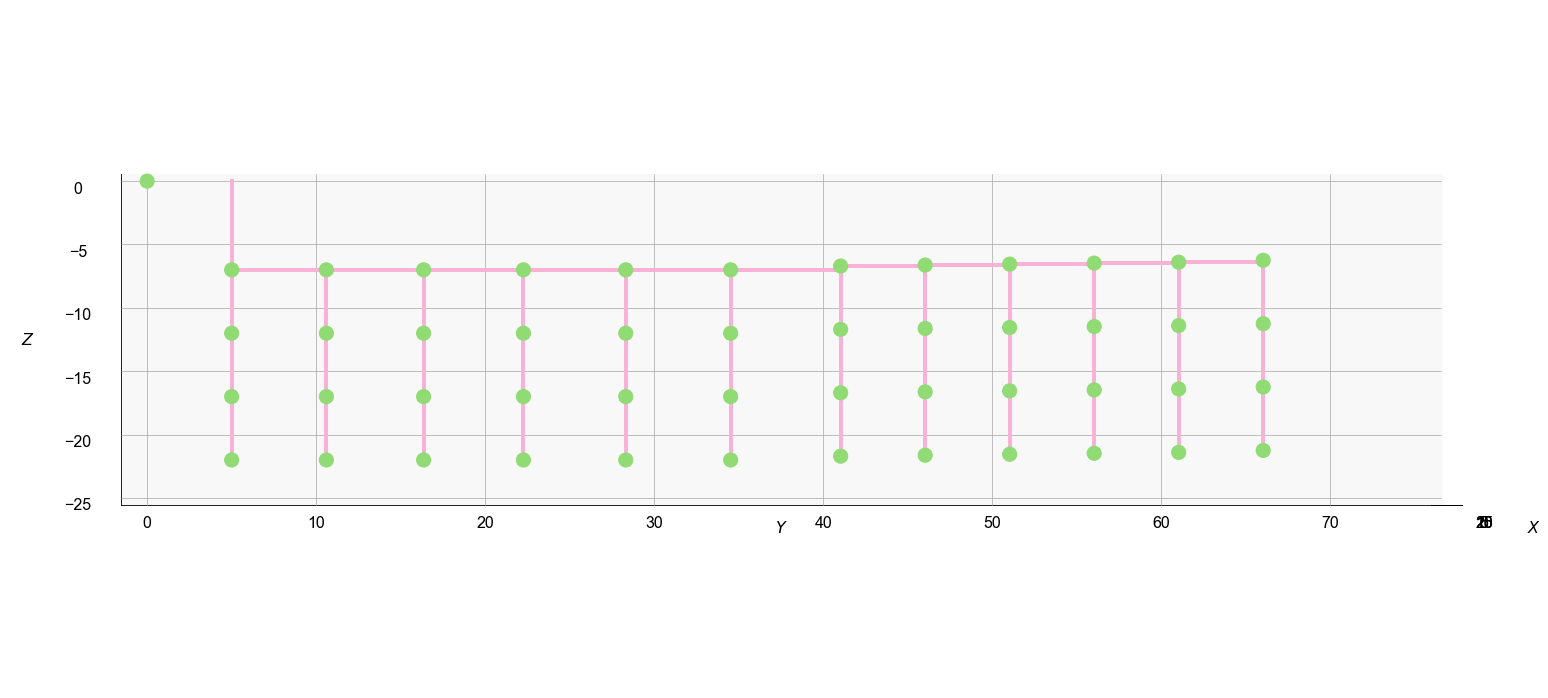

In [117]:
total = copy.deepcopy(dv)
total.addVar('nid', 0.603)
total = total + sc.startingPoint(0,0,0)
total.turnOn(3)
total.setSpeeds(m=5, j=20)
ylast = 0

pic = sc.pics(channel=2, wait=2, lastPt=total)
pic.mx('&slideW/2')
pic.snap()
# head-on, in plane
for shortdir in ['+y', '+z']:
    for i,spacing in enumerate([0.5, 0.625, 0.75, 0.875, 1, 1.25]):
        pic.my(f'{ylast}+&margin')
#         print(pic.floatSC(f'{ylast}+&margin'))
        for z0frac in [0.9, 0.7, 0.5, 0.3]:
            for dz in [0.5]:
                if shortdir=='+y':
                    pic.mz(f'-{z0frac}*&slideW+{dz}')
                else:
                    pic.mz(f'-{z0frac}*&slideW+{dz}+&nid*{spacing}')
                pic.snap()
        if shortdir=='+y':
            ylast = f'{pic.cp[1]}+2*&nid*{spacing}'
        else:
            ylast = f'{pic.cp[1]}'
        

total = total+pic
        
total.turnOff(3)
total.withdraw()
total.printVolume()
total.plot(ele=0, azi=0, export=False, grids=True)
total.export(os.path.join(SBPFOLDER,'tripleLinesSide',  'tripleLinesXSPics.sbp'), [])
# print(total.convertFile('spacing'))

##### tripleLinesVert

Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesSide\tripleLinesVert_0.500.sbp
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesSide\tripleLinesVert_0.625.sbp
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesSide\tripleLinesVert_0.750.sbp
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesSide\tripleLinesVert_0.875.sbp
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesSide\tripleLinesVert_1.000.sbp
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesSide\tripleLinesVert_1.250.sbp
0.154 mL, 1 min 51 s
Exported C:\Users\lmf1\OneDriveNIST\NIST\data\shopbot\results\tripleLines\tripleLinesVert.png


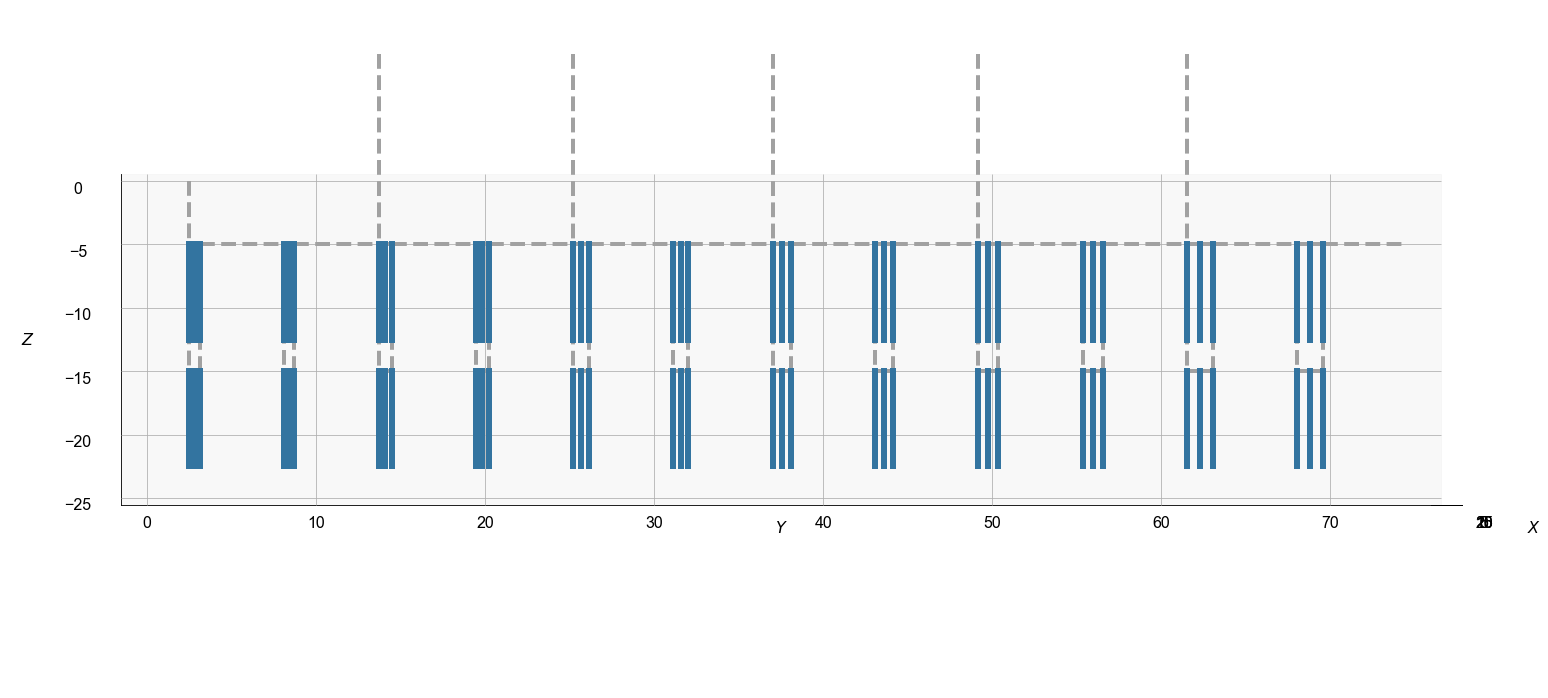

In [18]:
ylast = '&margin/2'
xmed = slideW/2
# head-on, in plane
total2 = copy.deepcopy(dv)
total2.addVar('nid', 0.603)
total2 = total2 + sc.startingPoint(0,0,0)
total2.turnOn(3)
total2.j2(xmed, ylast)
for i,spacing in enumerate([0.5, 0.625, 0.75, 0.875, 1, 1.25]):
    total = copy.deepcopy(dv)
    total.addVar('nid', 0.603)
    total = total + sc.startingPoint(total2.cp[0], total2.cp[1], total2.cp[2])
    total.turnOn(3)
    total.j2(xmed, ylast)
    
    for j in [0,1]:
        # get 4 reps for each spacing
        for z0frac in [0.5,0]:
            v1 = sc.verts(lastPt=total)
            v1.upDownRowReps(direc='+y', p0=f'{ylast}', const=xmed, spacing=f'{spacing}*&nid', reps=3)
            v1.zmax = f'-&slideW*{z0frac}-&margin/2-&margin*{0.5-z0frac}'
            v1.zmin = f'-&slideW*{z0frac+0.5}+&margin/2-&margin*{0.5-z0frac}'
            v1.downdisp = 0
            total = total + v1
            total2 = total2 + v1
   
        ylast = v1.cp[1]
        ylast = sc.p(ylast, '&margin')
        total.jy(ylast)
        total2.jy(ylast) 

    
    total.mz(10)
    
    total2.mz(10)
    total.turnOff(3)
    total2.turnOff(3)
    total.export(os.path.join(SBPFOLDER,'tripleLinesSide',  f'tripleLinesVert_{spacing:.3f}.sbp'), [])
    # print(total.convertFile('spacing'))

total2.turnOff(3)
total2.mz(10)
total2.printVolume()
total2.plot(ele=10, azi=10, export=True, fn=os.path.join(r'C:\Users\lmf1\OneDriveNIST\NIST\data\shopbot\results\tripleLines', f'tripleLinesVert.png'), grids=False)
total2.plot(ele=0, azi=0, export=False, grids=True)

0.000 mL, 2 min 45 s
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesSide\tripleLinesVertPics.sbp


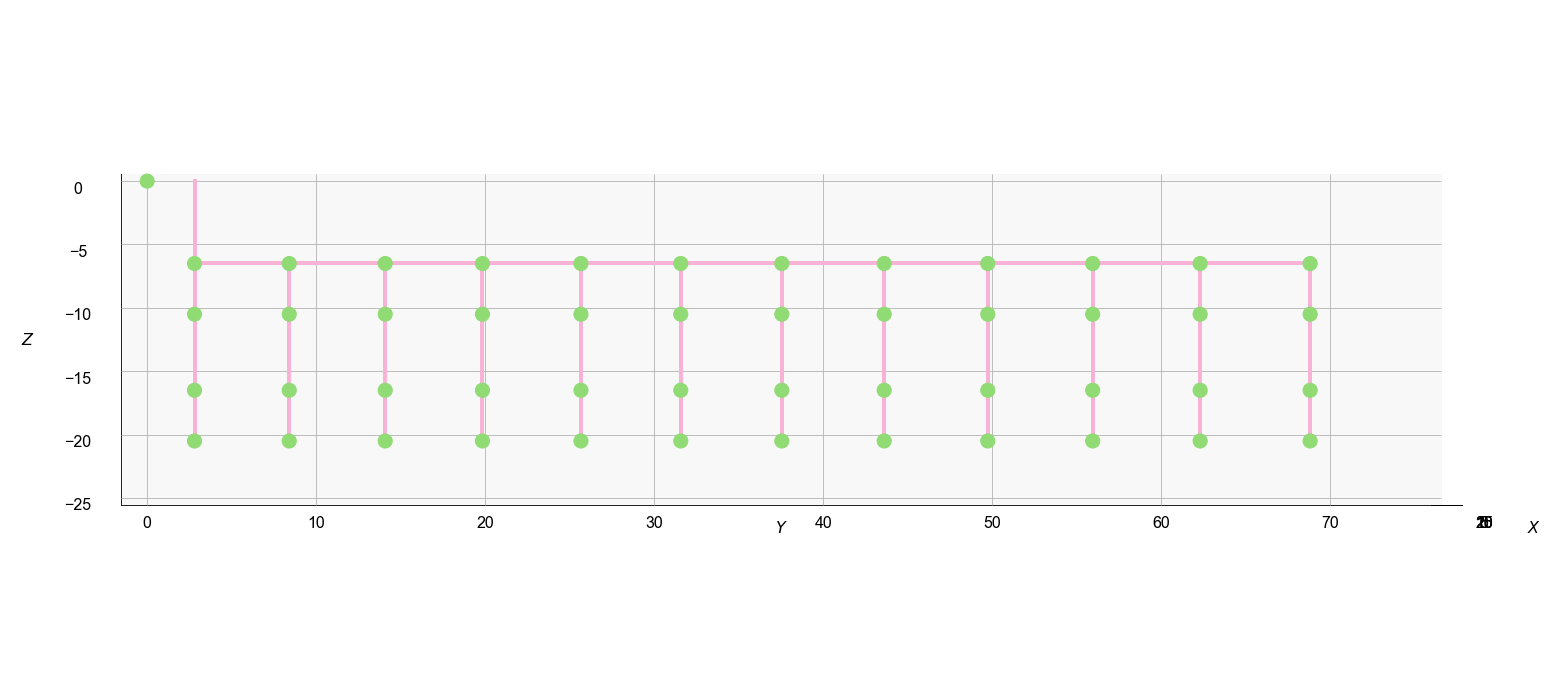

In [113]:
total = copy.deepcopy(dv)
total.addVar('nid', 0.603)
total = total + sc.startingPoint(0,0,0)
total.turnOn(3)
total.setSpeeds(m=5, j=20)
ylast = '&margin/2'
pic = sc.pics(channel=2, wait=2, lastPt=total)
pic.mx('&slideW/2')
pic.snap()
# head-on, in plane
for i,spacing in enumerate([0.5, 0.625, 0.75, 0.875, 1, 1.25]):
    for j in [0,1]:
        # get 4 reps for each spacing
        pic.my(f'{ylast}+{spacing}*&nid')
        for z0frac in [0.5,0]:
            for dz in [2,6]:
                pic.mz(f'-&slideW*{z0frac+0.5}+&margin/2+{dz}-&margin*{0.5-z0frac}')
                pic.snap()
        ylast = pic.cp[1]
        ylast = sc.p(ylast, f'&margin+{spacing}*&nid')
total=total+pic

total.turnOff(3)
total.withdraw()
total.printVolume()
total.plot(ele=0, azi=0, export=False, grids=True)
total.export(os.path.join(SBPFOLDER,'tripleLinesSide',  'tripleLinesVertPics.sbp'), [])
# print(total.convertFile('spacing'))

##### crossDoubleVert

Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesSide\crossDoubleVert_0.5_0.500.sbp
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesSide\crossDoubleVert_0.5_0.625.sbp
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesSide\crossDoubleVert_0.5_0.750.sbp
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesSide\crossDoubleVert_0.5_0.875.sbp
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesSide\crossDoubleVert_0.5_1.000.sbp
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesSide\crossDoubleVert_0.5_1.250.sbp
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesSide\crossDoubleVert_0_0.500.sbp
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesSide\crossDoubleVert_0_0.625.sbp
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesSide\crossDoubleVert_0

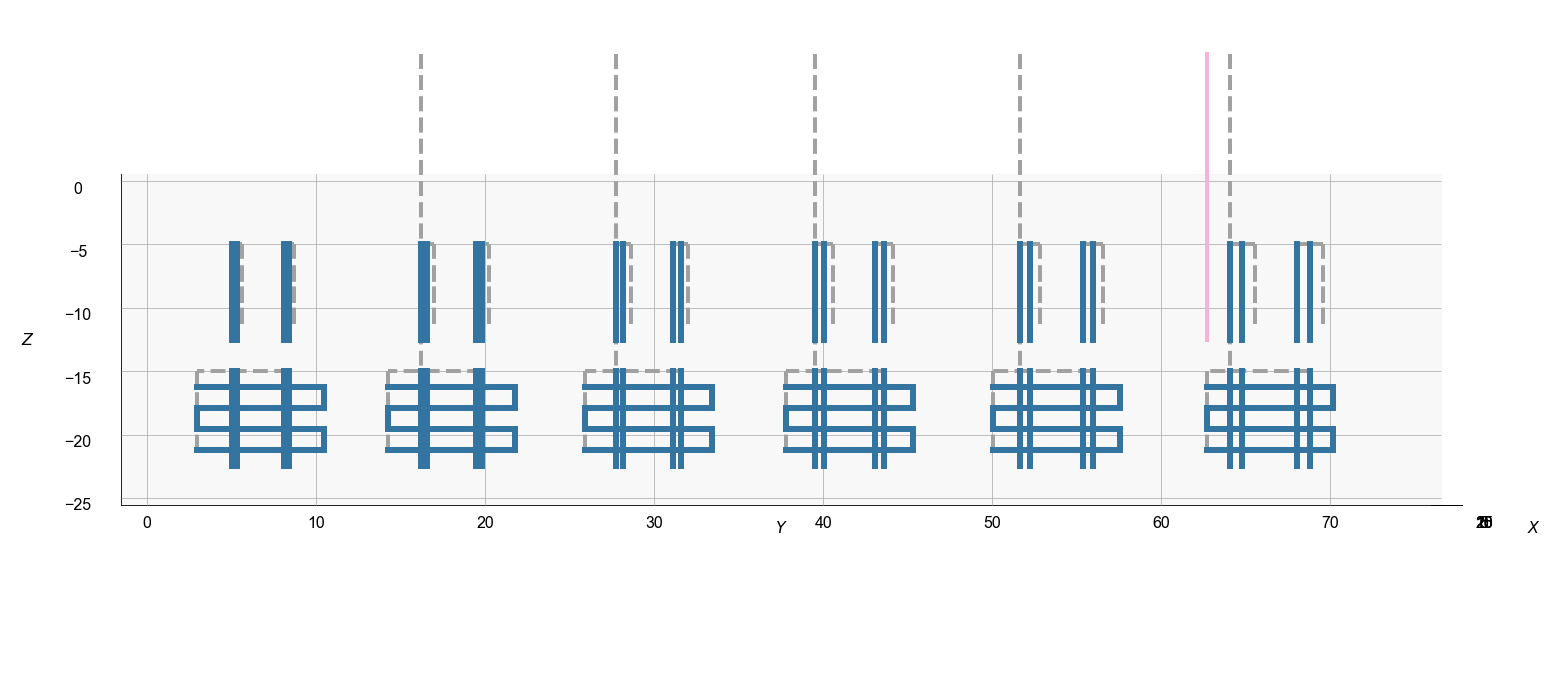

In [103]:
total2 = copy.deepcopy(dv)
total2.addVar('nid',0.603)
total2 = total2 + sc.startingPoint(0,0,0)
total2.turnOn(3)

xmed = slideW/2
# head-on, in plane
for z0frac in [0.5, 0]:
    ylast = ['&margin','&margin']
    for i,spacing in enumerate([0.5, 0.625, 0.75, 0.875, 1, 1.25]):
        total = copy.deepcopy(dv)
        total.addVar('nid',0.603)
        total = total + sc.startingPoint(total2.cp[0], total2.cp[1], total2.cp[2])
        total.turnOn(3)
        
        for j in [0,1]:
            # get 4 reps for each spacing
            v1 = sc.verts(lastPt=total)
            v1.my(f'{ylast[(j+1)%2]}')
            v1.upDownRowReps(direc='+y', p0=f'{ylast[(j+1)%2]}', const=xmed, spacing=f'{spacing}*&nid', reps=2)
            
            if z0frac==0.5:
                v1.zmin = f'-&slideW+&margin/2'
                v1.zmax = f'-&slideW/2-&margin/2'
            else:
                v1.zmin = f'-&slideW/2'
                v1.zmax = f'-&margin'
            v1.downdisp = 0
            total = total + v1
            total2 = total2+v1
            
            ylast[j] = v1.cp[1]
            
            if z0frac==0:
                zz4 = sc.zigzag(lastPt = total, killZigs=True)
                zz4.spacing1 = '&margin/3'
                zz4.spacing2 = '&margin/3'
                zz4.reps=4
                # draw zigzag on each pair
                zz4.width='&margin'
                zz4.x0 = sc.p(xmed, f'-0.5*&margin')
                zz4.z0 = f'{v1.zmin}+&margin/4'
                zz4.longdir = '+x'
                zz4.shortdir = '+z'

                # first pair
                zz4.y0 = sc.p(ylast[j],f'{spacing}*&nid') # place next to double line
                total = total + zz4
                total2 = total2+zz4
            
            if j==0:
                ylast[j] = sc.p(ylast[j], f'&margin/2+{spacing}*&nid')
            else:
                ylast[j] = sc.p(ylast[j], f'&margin*1.5+{spacing}*&nid')
                
        
            
        # draw zigzag
        
        if z0frac==0.5:
            zz4 = sc.zigzag(lastPt = total, killZigs=False)
            zz4.spacing1 = '&margin/3'
            zz4.spacing2 = '&margin/3'
            zz4.reps=4
            zz4.width = '1.5*&margin'
            zz4.x0 = sc.p(xmed, f'-{spacing}*&nid') # place behind double line
            zz4.y0 = f'{ylast[0]}-&margin-{spacing}*&nid/2'
            zz4.z0 = f'{v1.zmin}+&margin/4'
            zz4.longdir = '+y'
            zz4.shortdir = '+z'
            total = total + zz4
            total2 = total2+zz4
            
        
        total.mz(10)
        total2.mz(10)
        total.turnOff(3)
        total.export(os.path.join(SBPFOLDER,'tripleLinesSide',  f'crossDoubleVert_{z0frac}_{spacing:.3f}.sbp'), [])
        # print(total.convertFile('spacing'))
        total1 = copy.deepcopy(total)
        
    total.mz(f'-&slideW*{z0frac}')
    total2.mz(f'-&slideW*{z0frac}')

total2.turnOff(3)
total2.mz(10)
total2.printVolume()
total2.plot(ele=10, azi=10, export=True, fn=os.path.join(r'C:\Users\lmf1\OneDriveNIST\NIST\data\shopbot\results\tripleLines', f'crossDoubleVert.png'), grids=False)
total2.plot(ele=0, azi=0, export=False, grids=True)

In [76]:
[(5+8.103)/2, (16.206+19.45975)/2, (27.7135+31.118)/2, (39.5225+43.077)/2, (51.63+55.339)/2]

[6.5515, 17.832875, 29.41575, 41.29975, 53.4845]

In [ ]:
[('&margin+3*&margin/2 + &nid')/2, 
 ('3.0*&margin + 2.0*&nid+3.5*&margin + 3.25*&nid')/2, 
 ('5.0*&margin + 4.5*&nid+5.5*&margin + 6.0*&nid')/2,
 ('7.0*&margin + 7.5*&nid+7.5*&margin + 9.25*&nid')/2

]

['1.5*&margin+4i*&margin']


['&margin', '&margin']
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesSide\crossDoubleVert_0.5_0.500.sbp
[8.103, 16.206]
['3*&margin/2 + &nid', '3.0*&margin + 2.0*&nid']
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesSide\crossDoubleVert_0.5_0.625.sbp
[19.45975, 27.713499999999996]
['3.5*&margin + 3.25*&nid', '5.0*&margin + 4.5*&nid']
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesSide\crossDoubleVert_0.5_0.750.sbp
[31.117999999999995, 39.522499999999994]
['5.5*&margin + 6.0*&nid', '7.0*&margin + 7.5*&nid']
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesSide\crossDoubleVert_0.5_0.875.sbp
[43.077749999999995, 51.632999999999996]
['7.5*&margin + 9.25*&nid', '9.0*&margin + 11.0*&nid']
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesSide\crossDoubleVert_0.5_1.000.sbp
[55.339, 64.045]
['9.5*&margin + 13.0*&nid', '11.0*&margin + 15.0*&nid']
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesSide\crossDoubleVert_0.5_1.250.sbp
[5, 5]
['&margin', '&margin']
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesSide\crossDoubleVert_0_0.500.sbp
[8.103, 16.206]
['3*&margin/2 + &nid', '3.0*&margin + 2.0*&nid']
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesSide\crossDoubleVert_0_0.625.sbp
[19.45975, 27.713499999999996]
['3.5*&margin + 3.25*&nid', '5.0*&margin + 4.5*&nid']
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesSide\crossDoubleVert_0_0.750.sbp
[31.117999999999995, 39.522499999999994]
['5.5*&margin + 6.0*&nid', '7.0*&margin + 7.5*&nid']
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesSide\crossDoubleVert_0_0.875.sbp
[43.077749999999995, 51.632999999999996]
['7.5*&margin + 9.25*&nid', '9.0*&margin + 11.0*&nid']
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesSide\crossDoubleVert_0_1.000.sbp
[55.339, 64.045]
['9.5*&margin + 13.0*&nid', '11.0*&margin + 15.0*&nid']

0.000 mL, 1 min 12 s
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesSide\crossDoubleVertPics.sbp


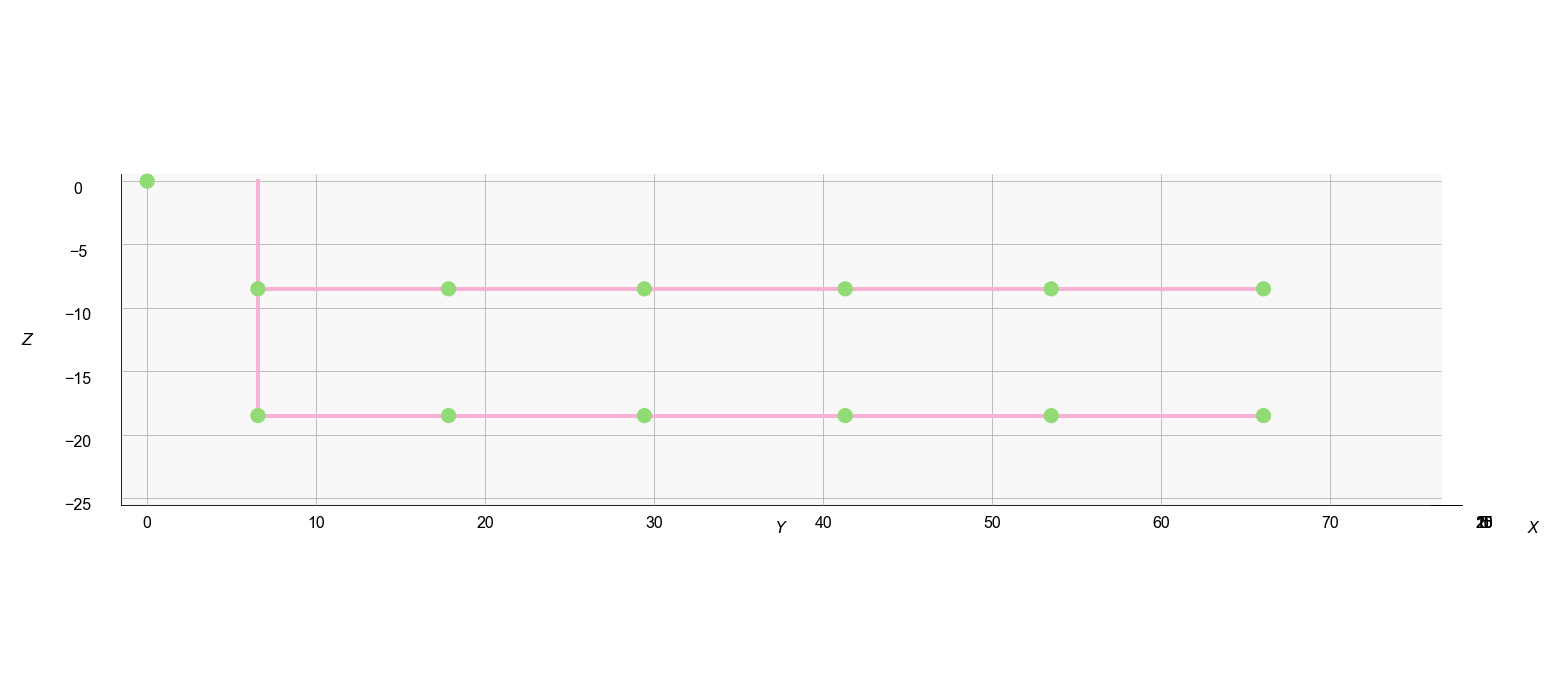

In [105]:
total = copy.deepcopy(dv)
total.addVar('nid', 0.603)
total = total + sc.startingPoint(0,0,0)
total.turnOn(3)
total.setSpeeds(m=5, j=20)

pic = sc.pics(channel=2, wait=2, lastPt=total)
pic.mx('&slideW/2')
pic.snap()
# head-on, in plane
for z0frac in [0.5,0]:
    ylast = '1.25*&margin'
    for i,spacing in enumerate([0.5, 0.625, 0.75, 0.875, 1, 1.25]):
        for j in [0.5]:
            # get 4 reps for each spacing
            pic.my(f'{ylast}+{spacing}*&nid')

            for k in [4]:
                if z0frac==0.5:
                    pic.mz(f'-&slideW*{z0frac+0.5}+&margin/2+{k}')
                else:
                    pic.mz(f'-&slideW*{z0frac+0.5}+{k}')
                pic.snap()
            ylast = f'{ylast}+2*&margin+4*{spacing}*&nid'
            
total=total+pic

total.turnOff(3)
total.withdraw()
total.printVolume()
total.export(os.path.join(SBPFOLDER, 'tripleLinesSide', 'crossDoubleVertPics.sbp'), [])
total.plot(ele=0, azi=0, export=False, grids=True)
# print(total.convertFile('spacing'))

##### crossDoubleHoriz

Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesSide\crossDoubleHoriz_0.5_0.500.sbp
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesSide\crossDoubleHoriz_0.5_0.625.sbp
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesSide\crossDoubleHoriz_0.5_0.750.sbp
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesSide\crossDoubleHoriz_0.5_0.875.sbp
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesSide\crossDoubleHoriz_0.5_1.000.sbp
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesSide\crossDoubleHoriz_0.5_1.250.sbp
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesSide\crossDoubleHoriz_0_0.500.sbp
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesSide\crossDoubleHoriz_0_0.625.sbp
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesSide\crossDoub

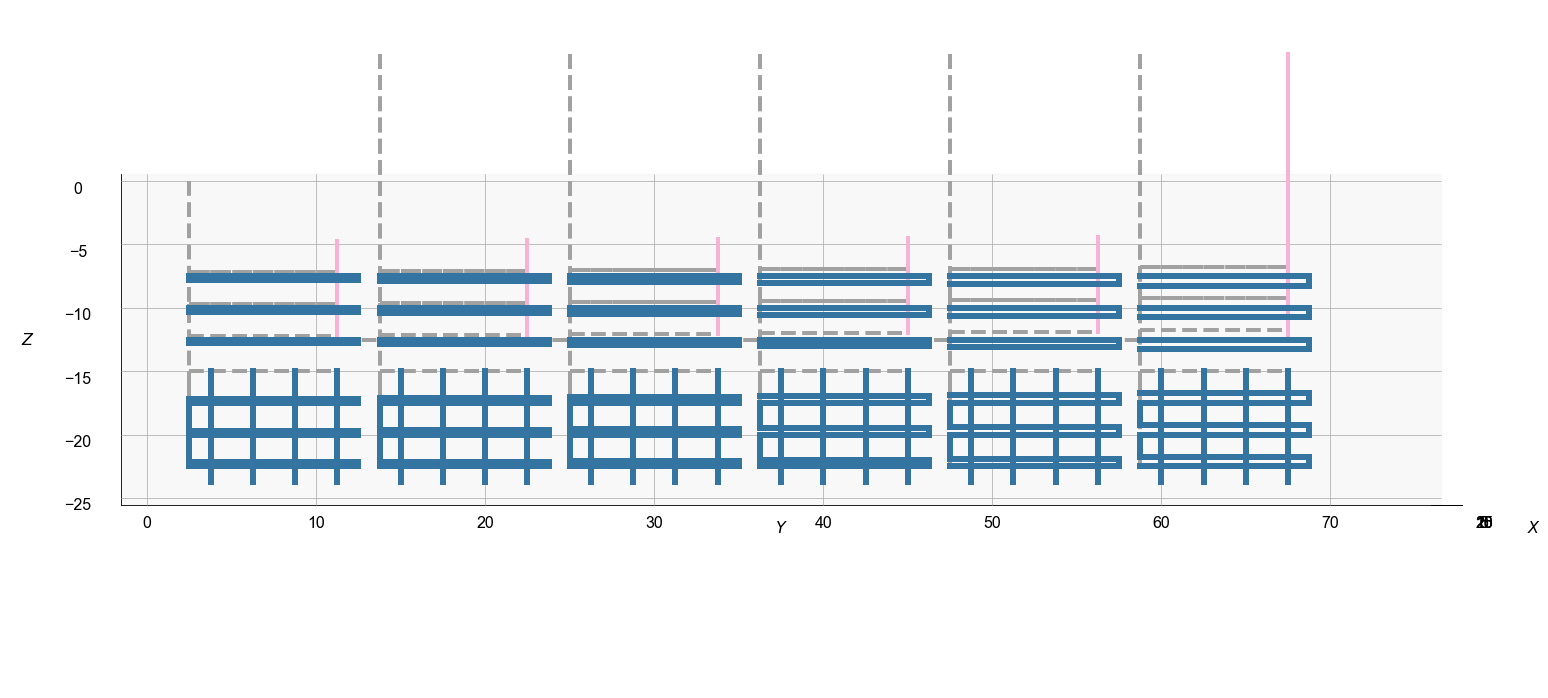

In [20]:
total2 = copy.deepcopy(dv)
total2.addVar('nid',0.603)
total2 = total2 + sc.startingPoint(0,0,0)
total2.turnOn(3)

xmed = slideW/2
# head-on, in plane
for z0frac in [0.5,0]:
    ylast = '&margin/2'
    for i,spacing in enumerate([0.5, 0.625, 0.75, 0.875, 1, 1.25]):
        total = copy.deepcopy(dv)
        total.addVar('nid',0.603)
        total = total + sc.startingPoint(total2.cp[0], total2.cp[1], total2.cp[2])
        total.turnOn(3)
        if z0frac==0.5:
            # bottom: double zigzag, then verts
            zz4 = sc.zigzag(lastPt = total, killZigs=False)
            zz4.spacing2 = f'{spacing}*&nid'
            zz4.spacing1 = f'&margin/2-{spacing}*&nid'
            zz4.width='2*&margin'
            zz4.x0 = xmed
            zz4.longdir = '+y'
            zz4.shortdir = '+z'
            zz4.y0 = ylast
            zz4.reps=6
            zz4.z0 = f'-&slideW*(0.5+{z0frac})+&margin/2'
            total = total + zz4
            total2 = total2 + zz4
        else:
            for k in range(3):
                zz4 = sc.zigzag(lastPt = total, killZigs=False)
                zz4.spacing2 = f'{spacing}*&nid'
                zz4.spacing1 = f'&margin/2-{spacing}*&nid'
                zz4.width='2*&margin'
                zz4.x0 = xmed
                zz4.longdir = '+y'
                zz4.shortdir = '+z'
                zz4.y0 = ylast
                zz4.reps = 2
                zz4.z0 = sc.p(sc.p(f'-&slideW*(0.5+{z0frac})', sc.t(k, zz4.spacing1)), sc.t((k-1), zz4.spacing2))
                total = total+zz4
                total2 = total2+zz4
                # zag across
                zz = sc.zigzag(lastPt=total, killZigs=True)
                zz.x0 = f'{xmed}-&margin*0.3'
                zz.y0 = f'{zz4.cp[1]}+&margin/4'
                zz.z0 = f'{zz4.cp[2]}+{spacing}*&nid'
                zz.width='&margin*0.6'
                zz.spacing1 = f'&margin/2'
                zz.spacing2 = f'&margin/2'
                zz.reps=4
                zz.mz(zz.z0)
                zz.shortdir = '+y'
                zz.longdir='+x'
                zz.sbp()
                zz.mz(sc.p(zz.z0,'&margin/2'))
                total = total + zz
                total2 = total2+zz
                
            
        # draw zigzag on each pair
    
        ylast = sc.p(zz4.cp[1],'&margin*2.25')
        if z0frac==0.5:
            v1 = sc.verts(lastPt=total)
            v1.upDownRowReps(direc='+y', p0=sc.p('&margin/4', zz4.cp[1]), const=sc.p(xmed, f'-{spacing}*&nid'), spacing='&margin/2', reps=4)
            v1.zmax = f'-&slideW*{z0frac}-&margin/2'
            v1.zmin = f'-&slideW*{z0frac+0.5}+&margin/4'
            v1.downdisp = 0
            total = total + v1
            total2 = total2+v1
            
        
        total.mz(10)
        total2.mz(10)
        total2.turnOff(3)
        total.turnOff(3)
        total.export(os.path.join(SBPFOLDER,'tripleLinesSide',  f'crossDoubleHoriz_{z0frac}_{spacing:.3f}.sbp'), [])
        
    total.mz(f'-&slideW*{z0frac}')
    total2.mz(f'-&slideW*{z0frac}')

total2.printVolume()
total2.plot(ele=10, azi=10, export=True, fn=os.path.join(r'C:\Users\lmf1\OneDriveNIST\NIST\data\shopbot\results\tripleLines', f'crossDoubleHoriz.png'), grids=False)
total2.plot(ele=0, azi=0, export=False, grids=True)
# print(total.convertFile('spacing'))

0.000 mL, 1 min 39 s
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesSide\crossDoubleHorizPics.sbp


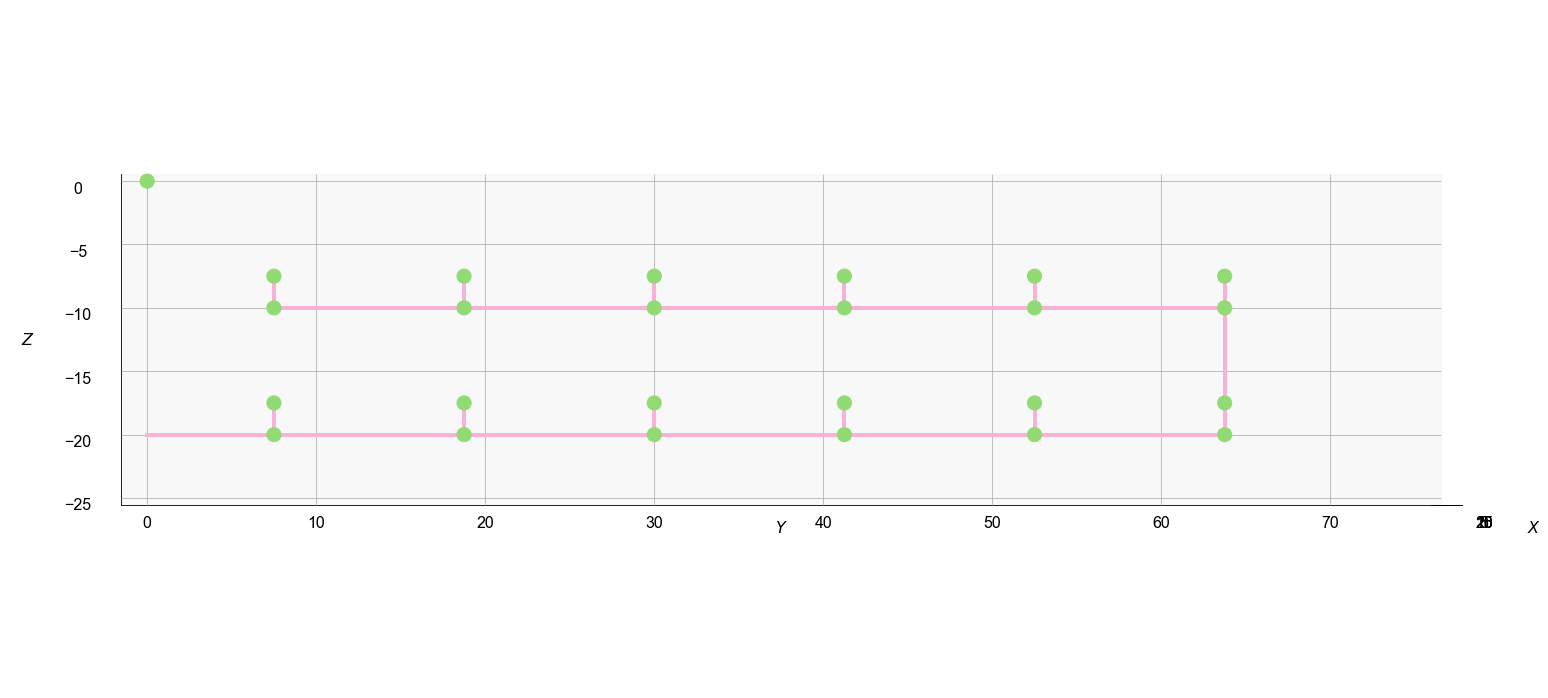

In [34]:
total = copy.deepcopy(dv)
total.addVar('nid',0.603)
total = total + sc.startingPoint(0,0,0)
total.turnOn(3)
total.setSpeeds(m=5, j=20)
xmed = slideW/2
pic = sc.pics(channel=2, wait=2, lastPt=total)
pic.mx('&slideW/2')
pic.snap()
# head-on, in plane
for z0frac in [0.5, 0]:
    ylast = '&margin/2'
    for i,spacing in enumerate([0.5, 0.625, 0.75, 0.875, 1, 1.25]):
        for k in [1,2]:
            if z0frac==0.5:
                pic.mz(f'-&slideW+&margin/2+{k}*&margin/2')
            else:
                pic.mz(f'-&slideW*0.5+{k}*&margin/2')
            for j in [1.5]:
                pic.my(sc.p(ylast,f'&margin/2*{j}+&margin/4'))
                pic.snap()
        ylast = sc.p(pic.cp[1],'&margin*1.25')

total = total+pic
total.turnOff(3)
total.withdraw()
total.printVolume()
total.plot(ele=0, azi=0, export=False, grids=True)
total.export(os.path.join(SBPFOLDER,'tripleLinesSide',  'crossDoubleHorizPics.sbp'), [])
# print(total.convertFile('spacing'))

##### tripleLinesHoriz

Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesSide\tripleLinesHoriz_0.500.sbp
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesSide\tripleLinesHoriz_0.625.sbp
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesSide\tripleLinesHoriz_0.750.sbp
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesSide\tripleLinesHoriz_0.875.sbp
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesSide\tripleLinesHoriz_1.000.sbp
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesSide\tripleLinesHoriz_1.250.sbp
0.188 mL, 1 min 55 s
Exported C:\Users\lmf1\OneDriveNIST\NIST\data\shopbot\results\tripleLines\tripleLinesHoriz.png


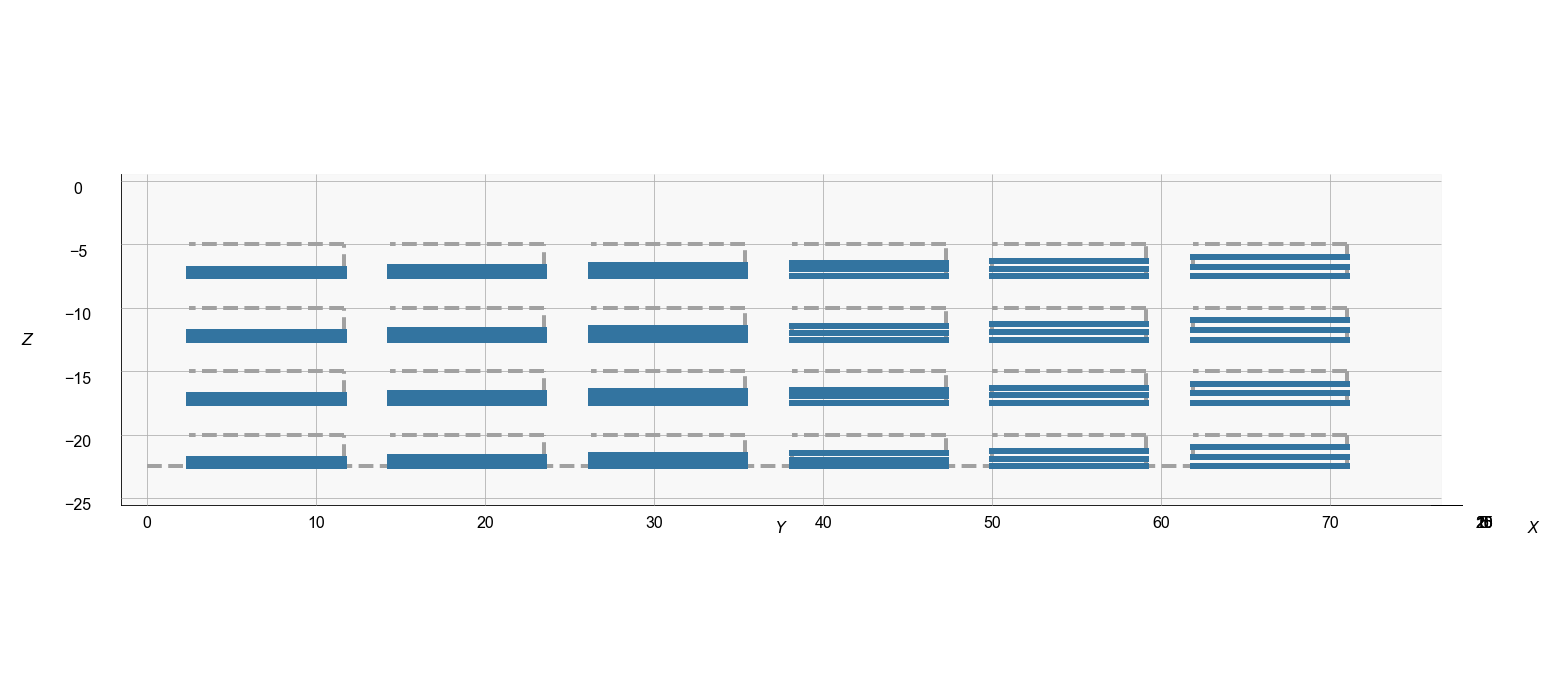

In [21]:
ylast = '&margin/2'

total2 = copy.deepcopy(dv)
total2.addVar('nid', 0.603)
total2 = total2 + sc.startingPoint(0,0,0)
total2.turnOn(3)
total2.mx('&slideW/2')
    
# head-on, in plane
for i,spacing in enumerate([0.5, 0.625, 0.75, 0.875, 1, 1.25]):
    total = copy.deepcopy(dv)
    total.addVar('nid', 0.603)
    total = total + sc.startingPoint(total2.cp[0], total2.cp[1], total2.cp[2])
    total.turnOn(3)

    total.mx('&slideW/2')

    for z0frac in [0.9, 0.7, 0.5, 0.3]:
# for i,spacing in enumerate([0.5]):
#     for z0frac in [0.9]:
        zz = sc.zigzag(lastPt=total, killZigs=True)
        zz.x0 = '&slideW/2'
        zz.y0 = ylast
        zz.z0 = f'-{z0frac}*&slideW'
        zz.width='1.825*&margin'
        zz.spacing1 = f'&nid*{spacing}'
        zz.spacing2 = f'&nid*{spacing}'
        zz.reps=3
        zz.mz(zz.z0)
        zz.shortdir = '+z'
        zz.longdir = '+y'
        zz.sbp()
        zz.jz(f'-{z0frac-0.1}*&slideW')
        zz.jy(ylast)
        total = total + zz
        total2 = total2 + zz

    ylast = f'{ylast}+2.375*&margin'
    
    total.mz(10)
    total2.mz(10)
    total.turnOff(3)
    total2.turnOff(3)
    total.export(os.path.join(SBPFOLDER, 'tripleLinesSide',  f'tripleLinesHoriz_{spacing:.3f}.sbp'), [])
# print(total.convertFile('spacing'))

total2.printVolume()
total2.plot(ele=10, azi=10, export=True, fn=os.path.join(r'C:\Users\lmf1\OneDriveNIST\NIST\data\shopbot\results\tripleLines', f'tripleLinesHoriz.png'), grids=False)
total2.plot(ele=0, azi=0, export=False, grids=True)

0.000 mL, 1 min 38 s
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesSide\tripleLinesHorizPics.sbp


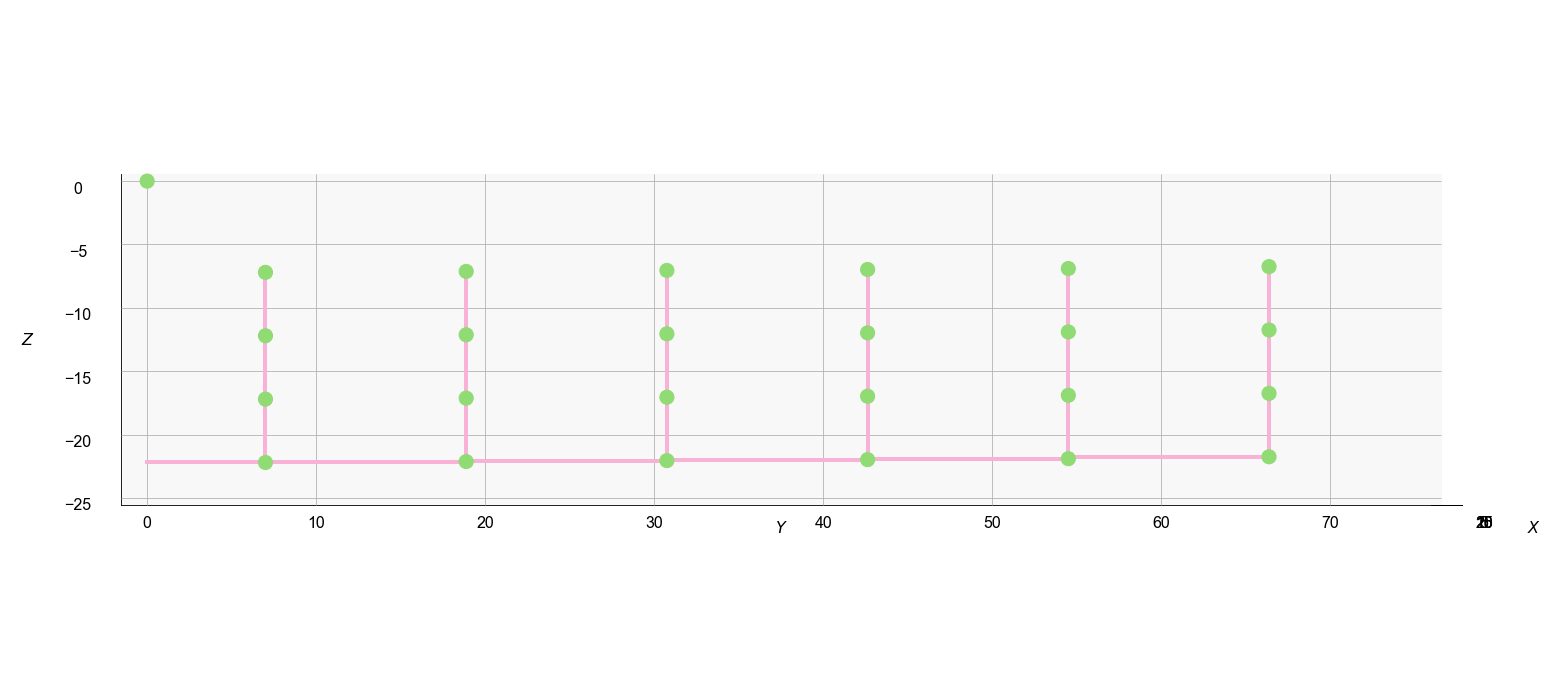

In [118]:
total = copy.deepcopy(dv)
total.addVar('nid', 0.603)
total = total + sc.startingPoint(0,0,0)
total.turnOn(3)
total.setSpeeds(m=5, j=20)
ylast = '&margin/2'
pic = sc.pics(channel=2, wait=2, lastPt=total)
pic.mx('&slideW/2')
pic.snap()
# head-on, in plane
for i,spacing in enumerate([0.5, 0.625, 0.75, 0.875, 1, 1.25]):
    for z0frac in [0.9, 0.7, 0.5, 0.3]:
        pic.mz(f'-{z0frac}*&slideW+&nid*{spacing}')
#         for dy in range(0,int(pic.floatSC('1.825*&margin')),4):
        for dy in [int(pic.floatSC('1.825*&margin'))/2]:
            pic.my(f'{ylast}+{dy}')
            pic.snap()
    ylast = f'{ylast}+2.375*&margin'
total = total+pic

total.turnOff(3)
total.withdraw()
total.printVolume()
total.plot(ele=0, azi=0, grids=True, export=False)
total.export(os.path.join(SBPFOLDER, 'tripleLinesSide', 'tripleLinesHorizPics.sbp'), [])
# print(total.convertFile('spacing'))

##### tripleLinesUnder

Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesUnder\tripleLinesUnder_0.500.sbp
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesUnder\tripleLinesUnder_0.625.sbp
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesUnder\tripleLinesUnder_0.750.sbp
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesUnder\tripleLinesUnder_0.875.sbp
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesUnder\tripleLinesUnder_1.000.sbp
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesUnder\tripleLinesUnder_1.250.sbp
0.188 mL, 1 min 35 s
Exported C:\Users\lmf1\OneDriveNIST\NIST\data\shopbot\results\tripleLines\tripleLinesUnder.png


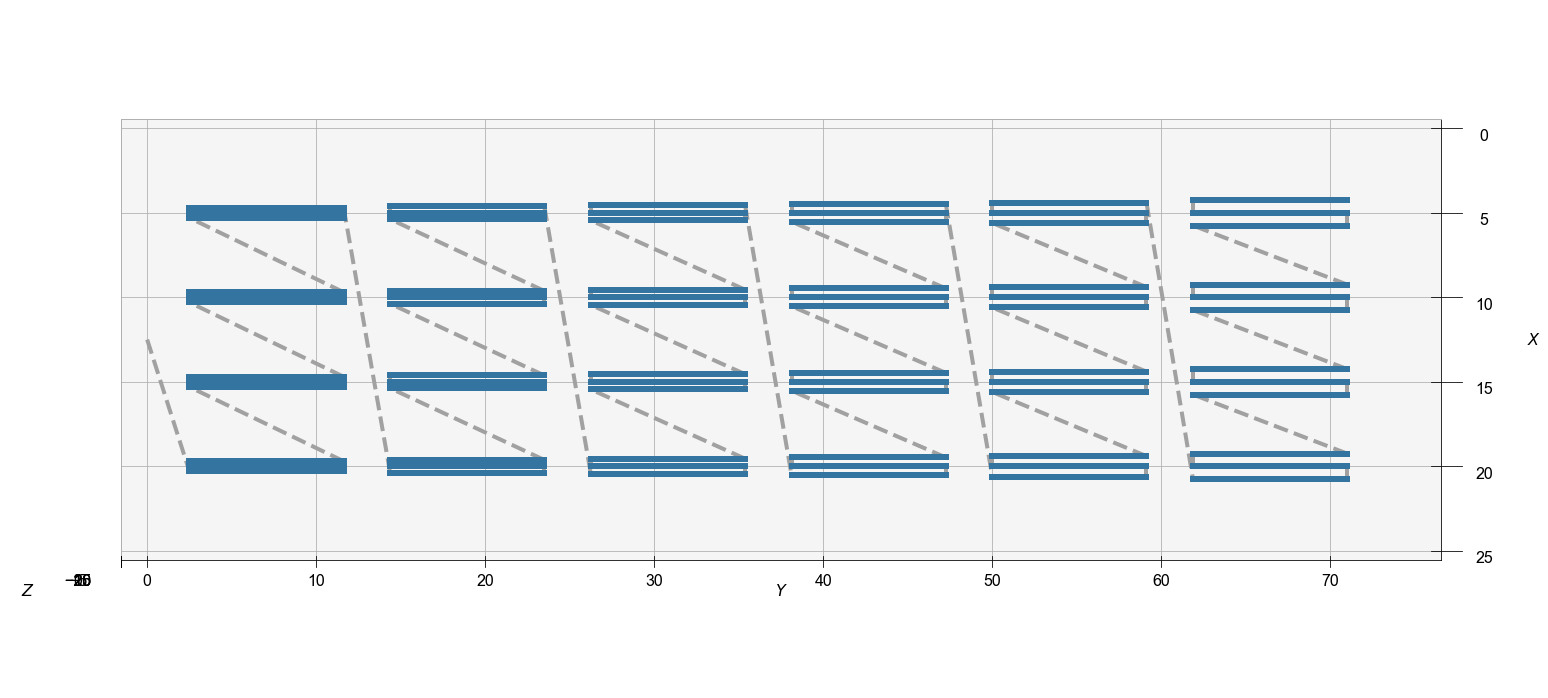

In [7]:
ylast = '&margin/2'

total2 = copy.deepcopy(dv)
total2.addVar('nid', 0.603)
total2 = total2 + sc.startingPoint(0,0,0)
total2.turnOn(3)
total2.mx('&slideW/2')
    
# head-on, in plane
for i,spacing in enumerate([0.5, 0.625, 0.75, 0.875, 1, 1.25]):
    total = copy.deepcopy(dv)
    total.addVar('nid', 0.603)
    total = total + sc.startingPoint(total2.cp[0], total2.cp[1], total2.cp[2])
    total.turnOn(3)

    total.mz('-&slideW/2')

    for z0frac in [0.8, 0.6, 0.4, 0.2]:
        zz = sc.zigzag(lastPt=total, killZigs=True)
        zz.z0 = '-&slideW/2'
        zz.y0 = ylast
        zz.x0 = f'{z0frac}*&slideW+&nid*{spacing}'
        zz.width='1.825*&margin'
        zz.spacing1 = f'&nid*{spacing}'
        zz.spacing2 = f'&nid*{spacing}'
        zz.reps=3
        zz.shortdir = '-x'
        zz.longdir = '+y'
        zz.sbp()
        ylasti = zz.cp[1]
        total = total + zz
        total2 = total2 + zz

    ylast = f'{ylast}+2.375*&margin'
    total.mz(10)
    total2.mz(10)
    total.turnOff(3)
    total2.turnOff(3)
    total.export(os.path.join(SBPFOLDER, 'tripleLinesUnder', f'tripleLinesUnder_{spacing:.3f}.sbp'), [])


total2.printVolume()
total2.plot(ele=80, azi=10, export=True, fn=os.path.join(r'C:\Users\lmf1\OneDriveNIST\NIST\data\shopbot\results\tripleLines', f'tripleLinesUnder.png'), grids=False)
total2.plot(ele=90, azi=0, export=False, grids=True)

0.000 mL, 3 min 11 s
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesUnder\tripleLinesUnderPics.sbp


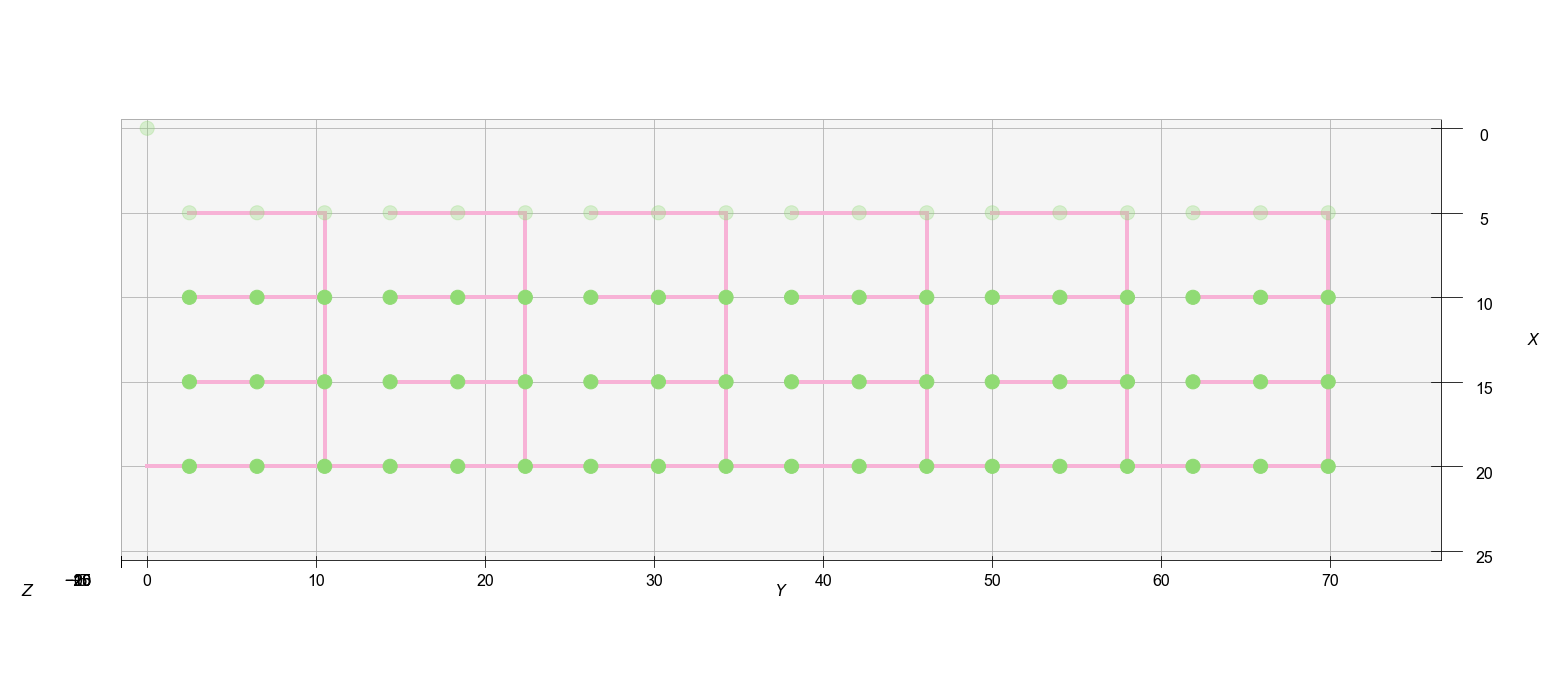

In [10]:
total = copy.deepcopy(dv)
total.addVar('nid', 0.603)
total = total + sc.startingPoint(0,0,0)
total.turnOn(3)
total.setSpeeds(m=5, j=20)
ylast = '&margin/2'
pic = sc.pics(channel=2, wait=2, lastPt=total)
pic.mz('-&slideW/2')
pic.snap()
# head-on, in plane
for i,spacing in enumerate([0.5, 0.625, 0.75, 0.875, 1, 1.25]):
    for z0frac in [0.8, 0.6, 0.4, 0.2]:
        pic.mx(f'{z0frac}*&slideW')
        for dy in range(0,int(pic.floatSC('1.825*&margin')),4):
            pic.my(f'{ylast}+{dy}')
            pic.snap()
    ylast = f'{ylast}+2.375*&margin'
total = total+pic

total.turnOff(3)
total.withdraw()
total.printVolume()
total.plot(ele=90, azi=0, export=False, grids=True)
total.export(os.path.join(SBPFOLDER, 'tripleLinesUnder', 'tripleLinesUnderPics.sbp'), [])
# print(total.convertFile('spacing'))

##### underCross

Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesUnder\crossUnder_0.5_0.500.sbp
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesUnder\crossUnder_0.5_0.625.sbp
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesUnder\crossUnder_0.5_0.750.sbp
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesUnder\crossUnder_0.5_0.875.sbp
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesUnder\crossUnder_0.5_1.000.sbp
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesUnder\crossUnder_0.5_1.250.sbp
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesUnder\crossUnder_0_0.500.sbp
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesUnder\crossUnder_0_0.625.sbp
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesUnder\crossUnder_0_0.750.sbp
Exported file C:\Users\lm

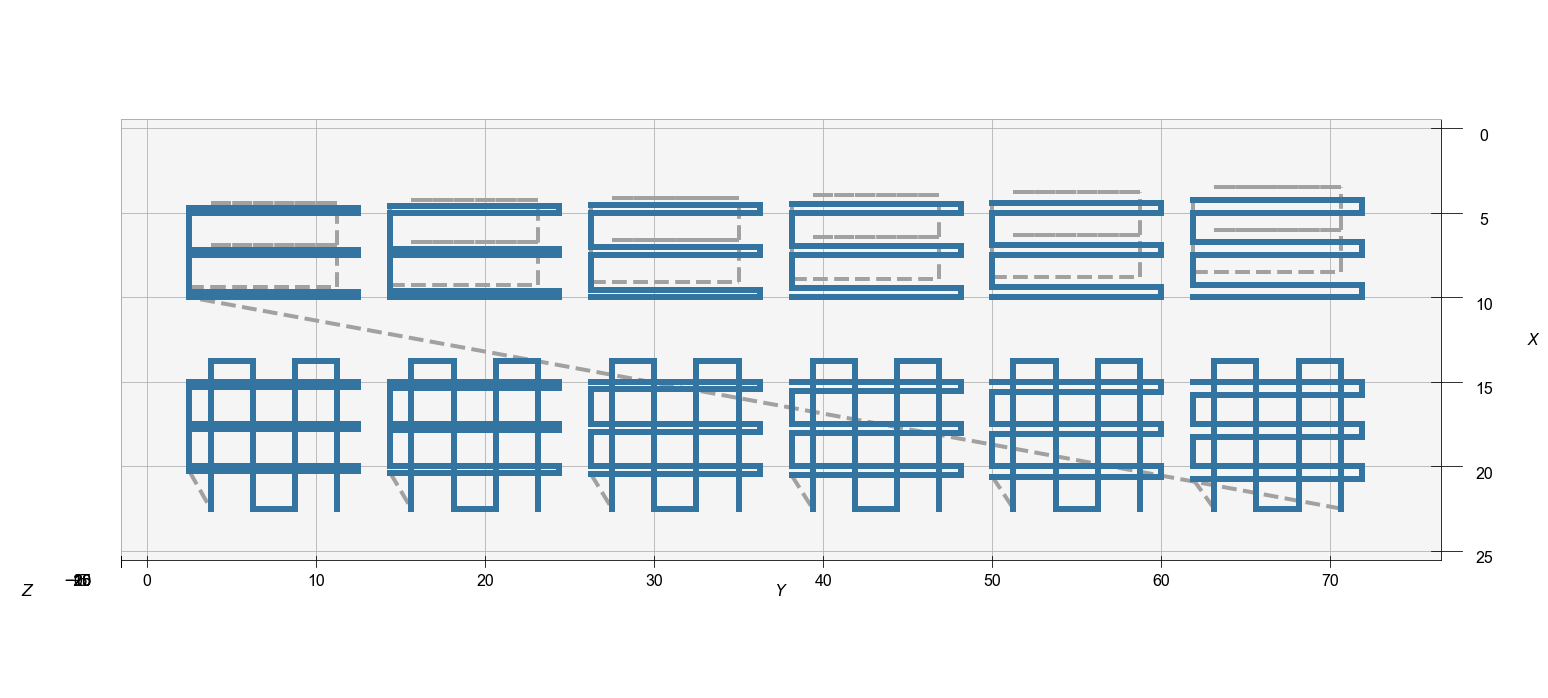

In [6]:
total2 = copy.deepcopy(dv)
total2.addVar('nid',0.603)
total2 = total2 + sc.startingPoint(0,0,0)
total2.turnOn(3)

zmed = -slideW/2
# head-on, in plane
for z0frac in [0.5, 0]:
    ylast = '&margin/2'
    for i,spacing in enumerate([0.5, 0.625, 0.75, 0.875, 1, 1.25]):
        total = copy.deepcopy(dv)
        total.addVar('nid',0.603)
        total = total + sc.startingPoint(total2.cp[0], total2.cp[1], total2.cp[2])
        total.turnOn(3)
        
        # bottom: double zigzag, then verts
        zz4 = sc.zigzag(lastPt = total, killZigs=False)
        zz4.spacing2 = f'{spacing}*&nid'
        zz4.spacing1 = f'&margin/2-{spacing}*&nid'
        zz4.width='2*&margin'
        zz4.z0 = zmed
        zz4.y0 = ylast
        zz4.x0 = f'&slideW/2-(0.25-{z0frac})/0.5*&margin'
        zz4.longdir = '+y'
        if z0frac==0.5:
            zz4.shortdir = '+x'
        else:
            zz4.shortdir = '-x'
        zz4.reps=6
        total = total + zz4
        total2 = total2 + zz4
        
        ylast = sc.p(ylast,'&margin*2.375')
            
        if z0frac==0.5:     
            # zag
            v1 = sc.zigzag(lastPt = total, killZigs=False)
            v1.spacing2 = f'&margin/2'
            v1.spacing1 = f'&margin/2'
            v1.width='&slideW/2-3/4*&margin'
            v1.z0 = sc.p(zmed, f'{spacing}*&nid')
            total.mz(v1.z0)
            v1.y0 = sc.p('&margin/4', zz4.cp[1])
            v1.x0 = f'&slideW-&margin/2'
            v1.longdir = '-x'
            v1.shortdir = '+y'
            v1.reps=4
            total = total + v1
            total2 = total2+v1
        else:
            # vertical lines
            for xi in range(3):
                v1 = sc.verts(lastPt=total)
                v1.upDownRowReps(direc='+y', p0=sc.p(f'&margin/4', zz4.cp[1])
                                 , const=f'-{spacing}*&nid*(2+{xi})+&slideW/2-&margin/2-(&margin/2-{spacing}*&nid)*{xi}', spacing='&margin/2', reps=4)
                v1.zmax = f'-&slideW/2+&margin/2'
                v1.zmin = f'-&slideW/2-&margin/2'
                v1.downdisp = 0
                total = total + v1
                total2 = total2+v1
                
            
        # draw zigzag on each pair
    
        

        
        total.mz(10)
        total2.mz(10)
        total2.turnOff(3)
        total.turnOff(3)
        total.export(os.path.join(SBPFOLDER,'tripleLinesUnder',  f'crossUnder_{z0frac}_{spacing:.3f}.sbp'), [])
        
    total.mz(f'-&slideW*{z0frac}')
    total2.mz(f'-&slideW*{z0frac}')

total2.printVolume()
total2.plot(ele=80, azi=10, export=True, fn=os.path.join(r'C:\Users\lmf1\OneDriveNIST\NIST\data\shopbot\results\tripleLines', f'crossUnder.png'), grids=False)
total2.plot(ele=90, azi=0, export=False, grids=True)
# print(total.convertFile('spacing'))

0.000 mL, 4 min 24 s
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\tripleLinesUnder\crossUnderPics.sbp


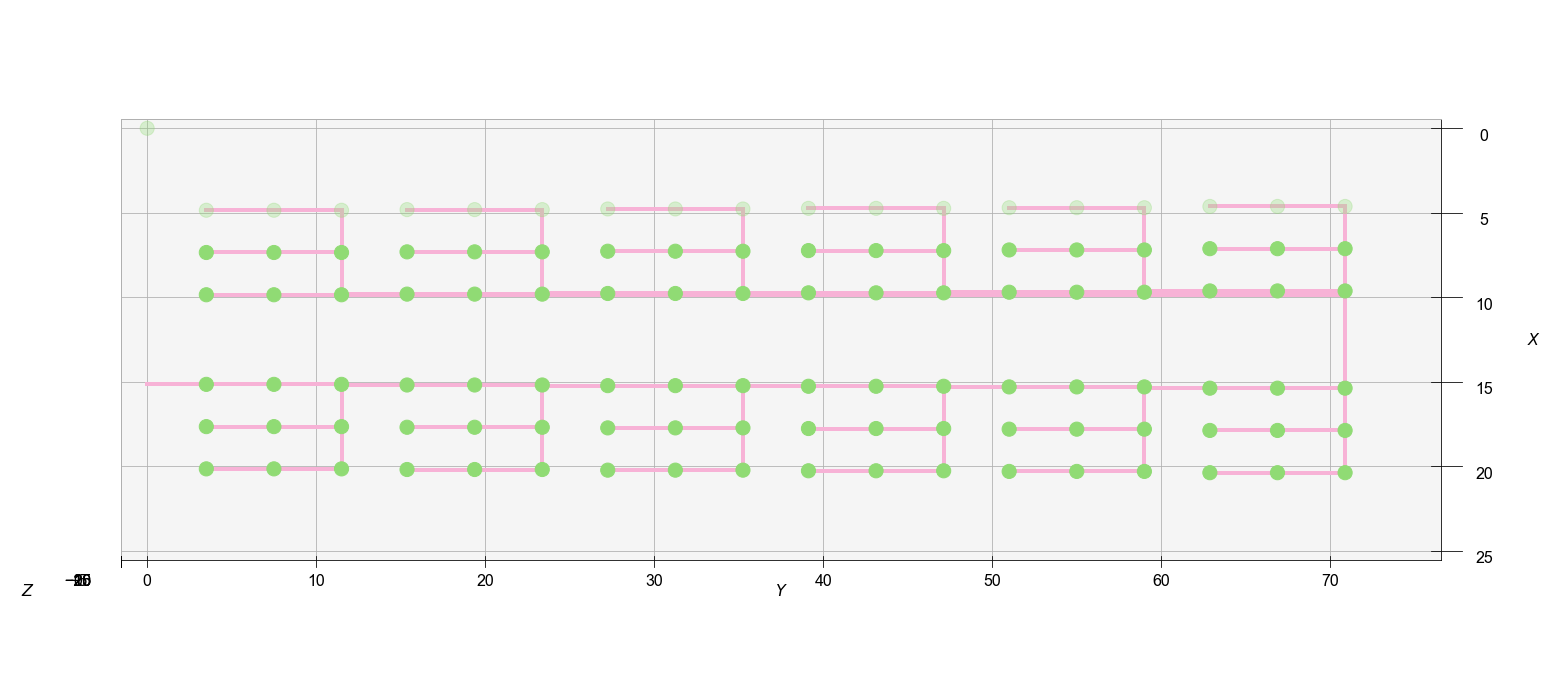

In [11]:
total = copy.deepcopy(dv)
total.addVar('nid', 0.603)
total = total + sc.startingPoint(0,0,0)
total.turnOn(3)
total.setSpeeds(m=5, j=20)

zmed = -slideW/2
pic = sc.pics(channel=2, wait=2, lastPt=total)
pic.mz('-&slideW/2')
pic.snap()
# head-on, in plane
for z0frac in [0.5,0]:
    ylast = '&margin/2'
    for i,spacing in enumerate([0.5, 0.625, 0.75, 0.875, 1, 1.25]):
        for xi in range(3):
            x0 = f'&slideW/2-(0.25-{z0frac})/0.5*&margin'
            spacing1 = f'{spacing}*&nid'
            spacing2 = f'&margin/2-{spacing}*&nid'
            if z0frac==0:
                pic.mx(f'{x0}-{spacing1}/2-({spacing1}+{spacing2})*{xi}')
            else:
                pic.mx(f'{x0}+{spacing1}/2+({spacing1}+{spacing2})*{xi}')
            for dy in range(0, int(pic.floatSC('2*&margin')), 4):
                pic.my(f'{ylast}+{dy}+1')
                pic.snap()
        ylast = sc.p(ylast,'&margin*2.375')
total = total+pic
total.turnOff(3)
total.withdraw()
total.printVolume()
total.plot(ele=90, azi=0, export=False, grids=True)
total.export(os.path.join(SBPFOLDER, 'tripleLinesUnder', 'crossUnderPics.sbp'), [])
# print(total.convertFile('spacing'))

#### test

0.006 mL, 0 min 9 s
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP files\t_test.sbp


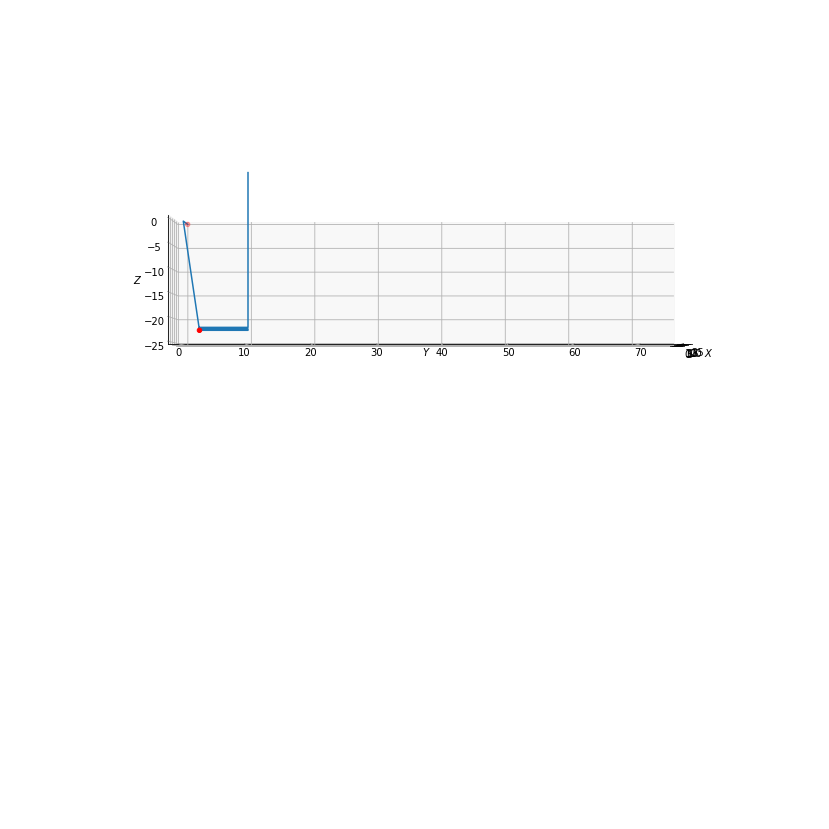

In [5]:
total = copy.deepcopy(dv)
total.addVar('nid', 0.603)
total = total + sc.startingPoint(0,0,0)
total.turnOn(3)

ylast = '&margin/2'
total.mx('&slideW/2')
# head-on, in plane
for i,spacing in enumerate([0.5]):
    for z0frac in [0.9]:
# for i,spacing in enumerate([0.5]):
#     for z0frac in [0.9]:
        zz = sc.zigzag(lastPt=total, killZigs=True)
        zz.x0 = '&slideW/2'
        zz.y0 = ylast
        zz.z0 = f'-{z0frac}*&slideW'
        zz.width='1.5*&margin'
        zz.spacing1 = f'&nid*{spacing}'
        zz.spacing2 = f'&nid*{spacing}'
        zz.reps=3
        zz.mz(zz.z0)
        zz.shortdir = '+z'
        zz.longdir = '+y'
        total = total + zz
    ylast = zz.cp[1]
    ylast = f'{ylast}+&margin'


total.turnOff(3)
total.mz(10)
total.printVolume()
total.plot(ele=0, azi=0)
total.export(os.path.join(SBPFOLDER, 't_test.sbp'), [])
# print(total.convertFile('spacing'))